# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [140]:
!pip install graphviz
!pip install wand
!apt-get install libmagickwand-dev
!pip install xgboost

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libmagickwand-dev is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.9).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pprint as pp
from tabulate import tabulate as tb
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [4]:
def print_dict(d: dict, key_label = 'Key', item_label = 'Item'):
    print(tb(d.items(), headers = [key_label, item_label]))

In [5]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [6]:
data = pd.read_csv("students_data.csv")
data.shape

(1044, 36)

In [7]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [8]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Разделите данные на две части - данные для моделирования (80%) и отложенную выборку (20%). Убедитесь, что распределение целевой переменной (`G3`) одинаково в обоих частях.  
  __NB__: Отложенную выборку нужно использовать только для финальной оценки качества модели. Обучение и кросс-валидацию следует проводить на данных для моделирования.  
* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

### Преобразование данных

Проверить на ошибочные значения

In [9]:
# Check mistakes in categorical values
def count_categories(data_frame=data, target_type = 'object', drop_id = True):
    categories = {label : set(data_frame[label].values) for label in data_frame.columns 
                  if data_frame[label].dtypes == target_type and not (drop_id and label == "ID")}
    for key in categories:
        categories[key] = (categories[key], len(categories[key]))
    # Let's watch what categorical values we have in each column
    return categories
# return categories
print_dict(count_categories())

Key         Item
----------  ---------------------------------------------------------------------
Subject     ({'Math', 'Por'}, 2)
school      ({'MS', 'GP'}, 2)
sex         ({'m', 'F', 'M'}, 3)
address     ({'U', 'R'}, 2)
famsize     ({'GT3', 'LE3'}, 2)
Pstatus     ({'t', 'A', 'T'}, 3)
Medu        ({'1', '3', '2', 'o', '4', '0'}, 6)
Fedu        ({'1', '3', '2', 'o', '4', '0'}, 6)
Mjob        ({'services', 'teacher', 'at-home', 'other', 'health', 'at_home'}, 6)
Fjob        ({'services', 'teacher', 'at-home', 'other', 'health', 'at_home'}, 6)
reason      ({'reputation', 'other', 'home', 'course'}, 4)
guardian    ({'futher', 'other', 'mother', 'father'}, 4)
schoolsup   ({'yes', 'no'}, 2)
famsup      ({'yes', 'no'}, 2)
paid        ({'yes', 'no'}, 2)
activities  ({'yes', 'no'}, 2)
nursery     ({'yes', 'no'}, 2)
higher      ({'yes', 'no'}, 2)
internet    ({'yes', 'no'}, 2)
romantic    ({nan, 'yes', 'no'}, 3)
cheating    ({nan, 'yes', 'no'}, 3)


In [10]:
# Columns with errors:
# sex ('m'), Pstatus ('t'), Medu and Fedu ('0' and strings instead int64)),
# Mjob and Fjob ('at-home' = 'at_home'), guardian ('futher'), 
# romantic and cheating have nan - I'll fix it later
#
data['sex'].replace('m', 'M', inplace=True)
data['Pstatus'].replace('t', 'T', inplace=True)
data['Medu'].replace('o', '0', inplace=True)
data['Fedu'].replace('o', '0', inplace=True)
data['Mjob'].replace('at-home', 'at_home', inplace=True)
data['Fjob'].replace('at-home', 'at_home', inplace=True)
data['guardian'].replace('futher', 'father', inplace=True)
print_dict(count_categories())

Key         Item
----------  ----------------------------------------------------------
Subject     ({'Math', 'Por'}, 2)
school      ({'MS', 'GP'}, 2)
sex         ({'F', 'M'}, 2)
address     ({'U', 'R'}, 2)
famsize     ({'GT3', 'LE3'}, 2)
Pstatus     ({'A', 'T'}, 2)
Medu        ({'1', '3', '2', '4', '0'}, 5)
Fedu        ({'1', '3', '2', '4', '0'}, 5)
Mjob        ({'services', 'teacher', 'other', 'health', 'at_home'}, 5)
Fjob        ({'services', 'teacher', 'other', 'health', 'at_home'}, 5)
reason      ({'reputation', 'other', 'home', 'course'}, 4)
guardian    ({'other', 'mother', 'father'}, 3)
schoolsup   ({'yes', 'no'}, 2)
famsup      ({'yes', 'no'}, 2)
paid        ({'yes', 'no'}, 2)
activities  ({'yes', 'no'}, 2)
nursery     ({'yes', 'no'}, 2)
higher      ({'yes', 'no'}, 2)
internet    ({'yes', 'no'}, 2)
romantic    ({nan, 'yes', 'no'}, 3)
cheating    ({nan, 'yes', 'no'}, 3)


In [11]:
# Cast to int64
data['Medu'] = data['Medu'].apply(int, convert_dtype=True)
data['Fedu'] = data['Fedu'].apply(int, convert_dtype=True)
print("Medu:", data['Medu'].dtypes, ", Fedu:", data['Fedu'].dtypes)

Medu: int64 , Fedu: int64


Проверить на пропущенные значения

In [12]:
# Find columns with NaN values
nullInfo = data.isnull().sum()
nullInfo[nullInfo > 0]

romantic     10
famrel       10
Dalc         10
Walc         10
cheating    700
dtype: int64

In [13]:
print(data["romantic"].value_counts(dropna=False))
print(data["famrel"].value_counts(dropna=False))
print(data["Dalc"].value_counts(dropna=False))
print(data["Walc"].value_counts(dropna=False))
print(data["cheating"].value_counts(dropna=False))

no     664
yes    370
NaN     10
Name: romantic, dtype: int64
4.0    508
5.0    283
3.0    167
2.0     46
1.0     30
NaN     10
Name: famrel, dtype: int64
1.0    719
2.0    194
3.0     69
5.0     26
4.0     26
NaN     10
Name: Dalc, dtype: int64
1.0    393
2.0    231
3.0    199
4.0    138
5.0     73
NaN     10
Name: Walc, dtype: int64
NaN    700
yes    175
no     169
Name: cheating, dtype: int64


In [14]:
# Column 'cheating' has too many NaN values, so it's better to drop it off the dataFrame
data = data.drop("cheating", axis=1)
data.head(1)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,15,13,14


In [15]:
# Check are there rows with several NaN values (to drop them)
nanCounter = data.isnull().sum(axis=1)
len(nanCounter[nanCounter > 1])

0

In [16]:
# Count mean
print("famrel: ", data['famrel'].describe()['mean'])
print("Dalc: ", data['Dalc'].describe()['mean'])
print("Walc: ", data['Walc'].describe()['mean'])

famrel:  3.9361702127659575
Dalc:  1.4970986460348163
Walc:  2.2911025145067696


In [17]:
# Replace NaN in dataframe with mean or neutral values
# *if we haven't information about relationships of a person, so there is none of them :D
data = data.fillna({'romantic': "no", 'famrel': 4.0, 'Dalc': 1.0, 'Walc': 2.0})

In [18]:
# Cast to int64 'categorical floats'
data['Walc'] = data['Walc'].apply(int, convert_dtype=True)
data['Dalc'] = data['Dalc'].apply(int, convert_dtype=True)
data['famrel'] = data['famrel'].apply(int, convert_dtype=True)

Основываясь на предыдующей работе, даатсет не содержит серьезных выбросов, способных крайне негативно повлиять на построение моделей

Категориальные признаки нужно привести к `One-Hot-Encoded` форме

In [19]:
# Label encoding
object_labels = [label for label in data.columns if data[label].dtypes == 'object']
data_labels_enc = data[object_labels].copy()

cats_info = count_categories(data_labels_enc)
for label in data_labels_enc.columns:
    cats_info[label] = (tuple(cats_info[label][0]), cats_info[label][1])
    for i in range(cats_info[label][1]):
        data_labels_enc[label].replace(cats_info[label][0][i], i, inplace=True)

data_labels_enc.head(5)

,Subject,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,1,0,0,0,0,0,2,3,2,1,1,1,1,0,0,0,1
1,1,1,0,0,0,1,2,2,3,1,1,1,1,0,1,0,0,1
2,1,1,1,0,1,1,3,0,3,1,1,1,1,1,1,0,0,1
3,1,0,1,0,0,1,2,0,2,2,1,1,1,0,0,0,0,1
4,1,1,0,0,0,1,4,2,2,1,1,0,1,1,0,0,1,1


In [20]:
# One hot encoding for several catigorical columns
enc = OneHotEncoder(handle_unknown='ignore')

ohenc_labels = ['Mjob', 'Fjob', 'guardian', 'reason']
ohenc_data = pd.DataFrame(enc.fit_transform(data_labels_enc[ohenc_labels]).toarray())
ohenc_data.columns = ['is_' + label + '_'+ str(cats_info[label][0][i]) 
                     for label in ohenc_labels
                     for i in range(cats_info[label][1])]
for label in ohenc_data.columns:
    ohenc_data[label] = ohenc_data[label].apply(int, convert_dtype=True)
ohenc_data.head(5)

,is_Mjob_services,is_Mjob_teacher,is_Mjob_other,is_Mjob_health,is_Mjob_at_home,is_Fjob_services,is_Fjob_teacher,is_Fjob_other,is_Fjob_health,is_Fjob_at_home,is_guardian_other,is_guardian_mother,is_guardian_father,is_reason_reputation,is_reason_other,is_reason_home,is_reason_course
0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
3,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0


In [21]:
# Drop one hot encoded columns and leave only binary
data_labels_enc = data_labels_enc.drop(ohenc_labels, axis=1)
# Rename columns binary categorical columns to understand what does '1' mean in cells
data_labels_enc.columns = ['is_' + label + '_'+ str(cats_info[label][0][1]) for label in data_labels_enc.columns]
data_labels_enc.head(5)

,is_Subject_Por,is_school_GP,is_sex_M,is_address_R,is_famsize_LE3,is_Pstatus_T,is_schoolsup_no,is_famsup_no,is_paid_no,is_activities_no,is_nursery_no,is_higher_no,is_internet_no,is_romantic_no
0,1,1,0,0,0,0,1,1,1,1,0,0,0,1
1,1,1,0,0,0,1,1,1,1,0,1,0,0,1
2,1,1,1,0,1,1,1,1,1,1,1,0,0,1
3,1,0,1,0,0,1,1,1,1,0,0,0,0,1
4,1,1,0,0,0,1,1,0,1,1,0,0,1,1


In [22]:
# Now we have DataFrame with one hot encoding for all categorical columns
data_object_encoded = data_labels_enc.join(ohenc_data)
data_object_encoded.head(5)

,is_Subject_Por,is_school_GP,is_sex_M,is_address_R,is_famsize_LE3,is_Pstatus_T,is_schoolsup_no,is_famsup_no,is_paid_no,is_activities_no,is_nursery_no,is_higher_no,is_internet_no,is_romantic_no,is_Mjob_services,is_Mjob_teacher,is_Mjob_other,is_Mjob_health,is_Mjob_at_home,is_Fjob_services,is_Fjob_teacher,is_Fjob_other,is_Fjob_health,is_Fjob_at_home,is_guardian_other,is_guardian_mother,is_guardian_father,is_reason_reputation,is_reason_other,is_reason_home,is_reason_course
0,1,1,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,1,1,0,0,0,1,1,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
3,1,0,1,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,1,1,0,0,0,1,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0


### Learning data

Ground Truth значения

In [23]:
labels = data['G3']

Данные для обучения

In [24]:
learning_data = data.drop(columns=['ID', 'G2', 'G3'])
learning_data = learning_data.drop(columns=object_labels)
learning_data = learning_data.join(data_object_encoded)

In [25]:
print('Learning data features: ', learning_data.shape[1])
learning_data.head(10)

Learning data features:  45


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,is_Subject_Por,is_school_GP,is_sex_M,is_address_R,is_famsize_LE3,is_Pstatus_T,...,is_higher_no,is_internet_no,is_romantic_no,is_Mjob_services,is_Mjob_teacher,is_Mjob_other,is_Mjob_health,is_Mjob_at_home,is_Fjob_services,is_Fjob_teacher,is_Fjob_other,is_Fjob_health,is_Fjob_at_home,is_guardian_other,is_guardian_mother,is_guardian_father,is_reason_reputation,is_reason_other,is_reason_home,is_reason_course
0,16,3,4,1,1,0,3,2,1,1,4,5,12,15,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,17,3,2,1,2,0,5,3,4,1,3,3,2,17,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,16,1,2,2,1,2,4,4,5,3,5,5,0,9,1,1,1,0,1,1,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
3,17,2,3,2,2,0,4,4,3,1,1,3,4,14,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,16,1,1,2,1,0,4,3,2,1,4,5,2,12,1,1,0,0,0,1,...,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
5,18,3,1,2,1,0,3,3,4,4,5,4,2,11,1,1,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
6,18,1,1,2,2,0,1,1,1,1,1,5,6,11,1,0,0,0,0,1,...,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
7,15,4,4,2,1,0,1,5,1,3,5,5,0,13,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
8,15,3,2,1,2,0,4,4,4,1,1,5,10,7,0,1,0,0,1,1,...,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
9,16,3,4,3,2,0,3,4,5,1,2,5,4,9,1,0,1,1,0,1,...,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0


Без G1 признака

In [26]:
learning_data_noG1 = learning_data.drop(columns=['G1'])
print('Learning data features (no G1): ', learning_data_noG1.shape[1])

Learning data features (no G1):  44


### Лишние признаки & Feature eng.

Посмотрим какие признаки сильно коррелируют между собой, ведь это может ухудшить результаты обучения

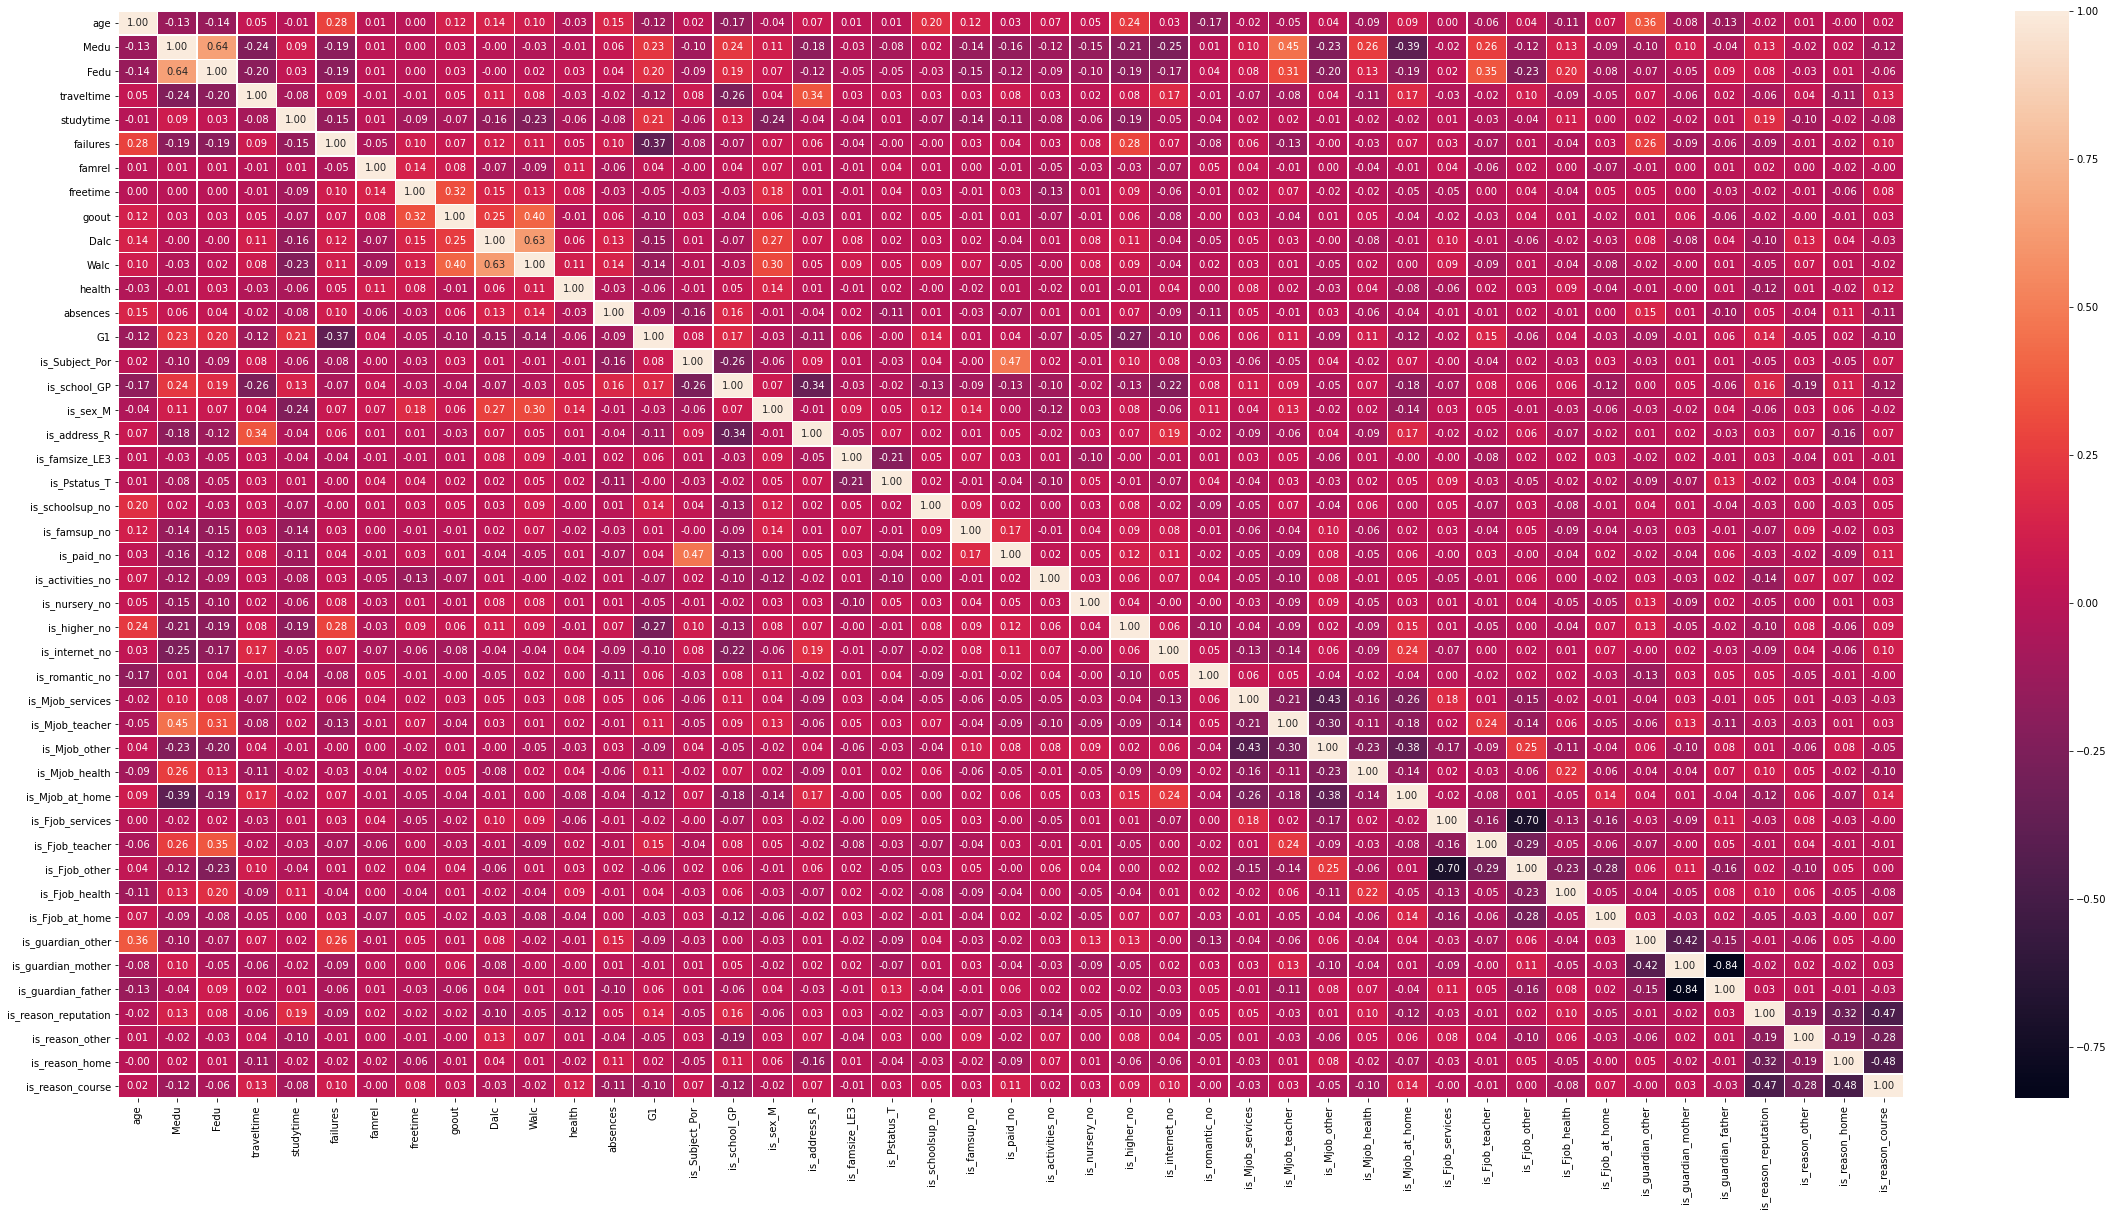

In [27]:
plt.figure(figsize=(40, 20))
sns.heatmap(learning_data.corr(), annot=True, fmt=".2f", linewidths=.5)

Выведем признаки с высокой корреляцией

In [28]:
def find_high_cov(data, cov_level=0.4) -> dict:
    high_cov = dict()
    for c in range(len(data.columns)):
        for i in range(c + 1, len(data.columns)):
            label_c = data.columns[c]
            label_i = data.columns[i]
            value = data.loc[label_c, label_i]
            if abs(value) >= cov_level:
                high_cov[(label_c, label_i)] = value
    return high_cov
print_dict(find_high_cov(learning_data.corr()), 'Pair', 'Cov')

Pair                                                Cov
--------------------------------------------  ---------
('Medu', 'Fedu')                               0.642063
('Medu', 'is_Mjob_teacher')                    0.452952
('Dalc', 'Walc')                               0.626551
('is_Subject_Por', 'is_paid_no')               0.473453
('is_Mjob_services', 'is_Mjob_other')         -0.428556
('is_Fjob_services', 'is_Fjob_other')         -0.702118
('is_guardian_other', 'is_guardian_mother')   -0.416173
('is_guardian_mother', 'is_guardian_father')  -0.836005
('is_reason_reputation', 'is_reason_course')  -0.46711
('is_reason_home', 'is_reason_course')        -0.479456


Многие из коррелирующих признаков - взаимоисключающие one-hot encoded признаки и их изменять не стоит  
***
Однако я обрачу внимание на взаимосвязь признаков **Medu** и **Fedu**, **Dalc** и **Walc**  
В данном случае эти 4 признака можно свести к 2м путем объединения:
* **Medu** + **Fedu** = **Pedu** (можно считать образование обоих родителей)
* **Walc** + **Dalc** = **Alc** (учитываем общее пристрастие к алкоголю)

In [29]:
learning_data['Alc'] = learning_data.loc[:, ['Walc', 'Dalc']].sum(1)
learning_data['Pedu'] = learning_data.loc[:, ['Fedu', 'Medu']].sum(1)
learning_data = learning_data.drop(columns=['Walc', 'Dalc', 'Fedu', 'Medu'])
learning_data.head()

,age,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,is_Subject_Por,is_school_GP,is_sex_M,is_address_R,is_famsize_LE3,is_Pstatus_T,is_schoolsup_no,is_famsup_no,is_paid_no,is_activities_no,...,is_romantic_no,is_Mjob_services,is_Mjob_teacher,is_Mjob_other,is_Mjob_health,is_Mjob_at_home,is_Fjob_services,is_Fjob_teacher,is_Fjob_other,is_Fjob_health,is_Fjob_at_home,is_guardian_other,is_guardian_mother,is_guardian_father,is_reason_reputation,is_reason_other,is_reason_home,is_reason_course,Alc,Pedu
0,16,1,1,0,3,2,1,5,12,15,1,1,0,0,0,0,1,1,1,1,...,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,5,7
1,17,1,2,0,5,3,4,3,2,17,1,1,0,0,0,1,1,1,1,0,...,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,4,5
2,16,2,1,2,4,4,5,5,0,9,1,1,1,0,1,1,1,1,1,1,...,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,8,3
3,17,2,2,0,4,4,3,3,4,14,1,0,1,0,0,1,1,1,1,0,...,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,2,5
4,16,2,1,0,4,3,2,5,2,12,1,1,0,0,0,1,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,5,2


In [30]:
learning_data_noG1 = learning_data.drop(columns=['G1'])

### Split data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = learning_data
x_no_g1 = learning_data_noG1
y = labels

установлен `random_state` чтобы контролировать разбиение

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)
x_no_g1_train, x_no_g1_test, y_train, y_test = train_test_split(x_no_g1, y, test_size=0.2, random_state=13)

Убедимся в правильности разбиения (в частности соотвествии `y`)

In [34]:
x_train.head(5)

,age,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,is_Subject_Por,is_school_GP,is_sex_M,is_address_R,is_famsize_LE3,is_Pstatus_T,is_schoolsup_no,is_famsup_no,is_paid_no,is_activities_no,...,is_romantic_no,is_Mjob_services,is_Mjob_teacher,is_Mjob_other,is_Mjob_health,is_Mjob_at_home,is_Fjob_services,is_Fjob_teacher,is_Fjob_other,is_Fjob_health,is_Fjob_at_home,is_guardian_other,is_guardian_mother,is_guardian_father,is_reason_reputation,is_reason_other,is_reason_home,is_reason_course,Alc,Pedu
860,19,1,2,0,4,3,1,1,12,11,0,1,1,0,1,0,1,0,1,1,...,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,2,7
269,19,1,2,2,4,3,5,5,15,9,0,1,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,6,6
581,19,2,2,0,2,3,4,2,0,10,0,1,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,5,8
775,16,3,1,0,4,2,2,3,4,12,1,1,1,1,0,1,1,1,1,1,...,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,3,4
669,16,2,2,1,4,3,3,5,14,10,0,1,0,0,1,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,4,4


In [35]:
x_no_g1_train.head(5)

,age,traveltime,studytime,failures,famrel,freetime,goout,health,absences,is_Subject_Por,is_school_GP,is_sex_M,is_address_R,is_famsize_LE3,is_Pstatus_T,is_schoolsup_no,is_famsup_no,is_paid_no,is_activities_no,is_nursery_no,...,is_romantic_no,is_Mjob_services,is_Mjob_teacher,is_Mjob_other,is_Mjob_health,is_Mjob_at_home,is_Fjob_services,is_Fjob_teacher,is_Fjob_other,is_Fjob_health,is_Fjob_at_home,is_guardian_other,is_guardian_mother,is_guardian_father,is_reason_reputation,is_reason_other,is_reason_home,is_reason_course,Alc,Pedu
860,19,1,2,0,4,3,1,1,12,0,1,1,0,1,0,1,0,1,1,0,...,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,2,7
269,19,1,2,2,4,3,5,5,15,0,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,6,6
581,19,2,2,0,2,3,4,2,0,0,1,0,0,0,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,5,8
775,16,3,1,0,4,2,2,3,4,1,1,1,1,0,1,1,1,1,1,1,...,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,3,4
669,16,2,2,1,4,3,3,5,14,0,1,0,0,1,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,4,4


In [36]:
y_train.head(5)

860    11
269     9
581     0
775    11
669     9
Name: G3, dtype: int64

Рассмотрим распределение G3 в выборках `y_train` и `y_test`

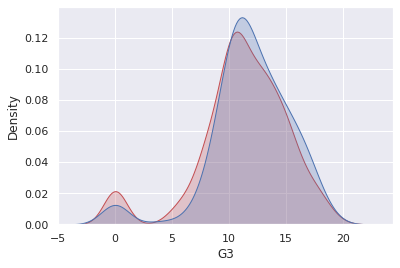

In [37]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(y_train, shade=True, color="r")
fig = sns.kdeplot(y_test, shade=True, color="b")
plt.show()

Мы можем видеть, что распределение G3 в `y_train` и `y_test` выборках одинаково

### Scale data

In [38]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [39]:
data_scaler = StandardScaler()

In [40]:
x_train = data_scaler.fit_transform(x_train)
x_test = data_scaler.transform(x_test)

In [41]:
x_no_g1_train = data_scaler.fit_transform(x_no_g1_train)
x_no_g1_test = data_scaler.transform(x_no_g1_test)

In [42]:
print('Train shape: ', x_train.shape)
print('Example:')
x_train[0]

Train shape:  (835, 43)
Example:


array([ 1.77837403, -0.72568138,  0.0362296 , -0.40926236,  0.05351395,
       -0.18409633, -1.8956647 , -1.77756101,  1.19804442, -0.03615913,
       -1.25268941,  0.61472578,  1.13199857, -0.61657545,  1.59787092,
       -2.72659924,  0.36042375, -0.80837203,  0.53534546,  1.00359929,
       -0.49437974, -0.3095166 , -0.50747426,  0.75468462,  1.90085761,
       -0.37303373, -0.79226278, -0.30718781, -0.48309685, -0.62583278,
       -0.25505102, -1.1430791 , -0.19962605,  4.23996141, -0.27573706,
        0.65558716, -0.54644333,  1.78773038, -0.34322668, -0.5925645 ,
       -0.81039869, -0.88058892,  1.00376842])

In [43]:
print('Test shape: ', x_test.shape)
print('Example:')
x_test[0]

Test shape:  (209, 43)
Example:


array([ 0.20116499, -0.72568138,  0.0362296 , -0.40926236,  1.14337127,
        0.77068897, -1.01432838,  1.03887816, -0.70439696,  1.62279005,
       -1.25268941,  0.61472578, -0.88339334, -0.61657545, -0.62583278,
        0.36675724,  0.36042375, -0.80837203,  0.53534546, -0.99641362,
       -0.49437974, -0.3095166 ,  1.97054331,  0.75468462,  1.90085761,
       -0.37303373, -0.79226278, -0.30718781, -0.48309685,  1.59787092,
       -0.25505102, -1.1430791 , -0.19962605, -0.2358512 , -0.27573706,
       -1.5253502 ,  1.83001594,  1.78773038, -0.34322668, -0.5925645 ,
       -0.81039869,  0.63756335,  0.51016027])

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* Для решения задачи примените следующие методы:  
  * Линейная регрессия + регуляризации  
  * Полиномиальная регрессия  
  * KNN  
  * Деревья решений, Random Forest  
  
  Для каждого метода выполните настройку гиперпараметров на кросс-валидации.  
<br>    
* Оцените качество каждой модели на отложенной выборке, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

In [ ]:
from sklearn import metrics

In [ ]:
def reg_scores(predicted, labels, printable=False):
  scores = dict()
  scores['mse'] = metrics.mean_squared_error(labels, predicted)
  scores['rmse'] = np.sqrt(scores['mse'])
  scores['mae'] = metrics.mean_absolute_error(labels, predicted)
  scores['medae'] = metrics.median_absolute_error(labels, predicted)
  scores['R2'] = metrics.r2_score(labels, predicted)
  # print
  if printable:
    scores_table = [(key, value) for key, value in scores.items()]
    print('SCORES:')
    print(tb(scores_table, headers=('metric', 'score'), tablefmt="fancy_grid"))
  return scores

In [ ]:
def reg_scores_compare(predicted: dict, labels: dict, printable=True):
  scores_train = reg_scores(predicted['train'], labels['train'])
  scores_test = reg_scores(predicted['test'], labels['test'])
  # print
  if printable:
    keys = scores_train.keys()
    train_values = scores_train.values()
    test_values = scores_test.values()
    scores_table = [(key, train, test) for key, train, test in 
                    zip(keys, train_values, test_values)]
    print('SCORES:')
    print(tb(scores_table, 
             headers=('metric', 'train scores', 'test scores'), 
             tablefmt="fancy_grid"))            
  return scores_train, scores_test

In [ ]:
def create_table_from_series(series, table_width=4):
  row_counter = 0
  row = []
  table = []
  for i in range(series.size):
    row.append(i)
    row.append(series.index[i])
    row.append("{:.3f}".format(series[i]))

    row_counter += 1
    if (row_counter + 1) % (table_width + 1) == 0:
      table.append(row)
      row = []
      row_counter = 0
  return table

In [ ]:
def create_columns_from_series(series, table_width=4):
  row_counter = 0
  row = []
  table = []
  for i in range(series.size):
    row.append(i)
    row.append(series.index[i])
    row.append("{:.3f}".format(series[i]))

    row_counter += 1
    if (row_counter + 1) % (table_width + 1) == 0:
      table.append(row)
      row = []
      row_counter = 0
  if len(row):
    for i in range((table_width - row_counter) * 2):
      row.append(' ')
    table.append(row)
  return table

In [ ]:
def reg_weights(model, columns, printable=True, table_width=4):
  weights = pd.Series(model.coef_, index=columns)
  sorted = abs(weights).sort_values(ascending=False)
  weights = weights[sorted.index]
  # print
  table = create_table_from_series(weights, table_width)
  if printable:
    print('WEIGHTS')
    print(weights)
  return weights


In [ ]:
reg_test_scores = dict()
reg_test_scores_nog1 = dict()

### Linear regression

In [ ]:
from sklearn import linear_model

#### Losso CV

In [ ]:
losso_model = linear_model.LassoCV(alphas=np.arange(0.1, 30, 0.1), normalize=True, cv=5)

In [ ]:
%%time
losso_model.fit(x_train, y_train)
print('Alpha: ', losso_model.alpha_)

Alpha:  0.1
CPU times: user 248 ms, sys: 212 ms, total: 460 ms
Wall time: 242 ms


Test

In [ ]:
y_predicted_train = losso_model.predict(x_train)
y_predicted_test  = losso_model.predict(x_test)

_, reg_test_scores['losso'] = reg_scores_compare({'train': y_predicted_train, 
                                                  'test': y_predicted_test},
                                                 {'train': y_train, 
                                                  'test': y_test})

SCORES:
╒══════════╤════════════════╤═══════════════╕
│ metric   │   train scores │   test scores │
╞══════════╪════════════════╪═══════════════╡
│ mse      │      13.6048   │    11.5461    │
├──────────┼────────────────┼───────────────┤
│ rmse     │       3.68847  │     3.39796   │
├──────────┼────────────────┼───────────────┤
│ mae      │       2.66373  │     2.41408   │
├──────────┼────────────────┼───────────────┤
│ medae    │       1.89809  │     1.70175   │
├──────────┼────────────────┼───────────────┤
│ R2       │       0.116701 │     0.0880885 │
╘══════════╧════════════════╧═══════════════╛


In [ ]:
_ = reg_weights(losso_model, learning_data.columns)

WEIGHTS
G1                      0.295871
is_Subject_Math        -0.000000
is_paid_yes            -0.000000
is_famsup_yes           0.000000
is_schoolsup_yes       -0.000000
is_Pstatus_T           -0.000000
is_famsize_GT3         -0.000000
is_address_U            0.000000
is_sex_M               -0.000000
is_school_GP            0.000000
Pedu                    0.000000
is_nursery_yes          0.000000
absences               -0.000000
health                 -0.000000
goout                  -0.000000
freetime               -0.000000
famrel                  0.000000
failures               -0.000000
studytime               0.000000
traveltime             -0.000000
is_activities_yes       0.000000
is_higher_yes           0.000000
Alc                    -0.000000
is_Fjob_services       -0.000000
is_reason_home          0.000000
is_reason_other        -0.000000
is_reason_reputation    0.000000
is_reason_course       -0.000000
is_guardian_father      0.000000
is_guardian_other      -0.000000
is

Метрики у модели очень слабые, а по весам можно видеть, что предсказание делается, основываясь только на `G1` признаке - предыдущей оценке

No G1

In [ ]:
losso_model_nog1 = linear_model.LassoCV(alphas=np.arange(0.1, 30, 0.1), normalize=True, cv=5)

In [ ]:
%%time
losso_model_nog1.fit(x_no_g1_train, y_train)
print('Alpha: ', losso_model_nog1.alpha_)

Alpha:  29.900000000000002
CPU times: user 258 ms, sys: 223 ms, total: 481 ms
Wall time: 259 ms


Test

In [ ]:
y_predicted_train = losso_model_nog1.predict(x_no_g1_train)
y_predicted_test  = losso_model_nog1.predict(x_no_g1_test)

_, reg_test_scores_nog1['losso'] = reg_scores_compare({'train': y_predicted_train, 
                                                       'test': y_predicted_test},
                                                      {'train': y_train, 
                                                       'test': y_test})

SCORES:
╒══════════╤════════════════╤═══════════════╕
│ metric   │   train scores │   test scores │
╞══════════╪════════════════╪═══════════════╡
│ mse      │       15.4023  │    13.0908    │
├──────────┼────────────────┼───────────────┤
│ rmse     │        3.92457 │     3.61813   │
├──────────┼────────────────┼───────────────┤
│ mae      │        2.8788  │     2.61368   │
├──────────┼────────────────┼───────────────┤
│ medae    │        2.21078 │     1.78922   │
├──────────┼────────────────┼───────────────┤
│ R2       │        0       │    -0.0339102 │
╘══════════╧════════════════╧═══════════════╛


In [ ]:
_ = reg_weights(losso_model_nog1, learning_data.drop(columns=['G1']).columns)

WEIGHTS
Pedu                    0.0
is_school_GP            0.0
is_activities_yes       0.0
is_paid_yes            -0.0
is_famsup_yes          -0.0
is_schoolsup_yes       -0.0
is_Pstatus_T           -0.0
is_famsize_GT3         -0.0
is_address_U            0.0
is_sex_M               -0.0
is_Subject_Math        -0.0
Alc                    -0.0
absences               -0.0
health                 -0.0
goout                  -0.0
freetime               -0.0
famrel                  0.0
failures               -0.0
studytime               0.0
traveltime             -0.0
is_nursery_yes          0.0
is_higher_yes           0.0
is_internet_yes         0.0
is_romantic_yes        -0.0
is_reason_home          0.0
is_reason_other        -0.0
is_reason_reputation    0.0
is_reason_course       -0.0
is_guardian_father      0.0
is_guardian_other      -0.0
is_guardian_mother     -0.0
is_Fjob_other          -0.0
is_Fjob_services       -0.0
is_Fjob_at_home        -0.0
is_Fjob_teacher         0.0
is_Fjob_heal

Убрав у модели `G1` признак мы вовсе лешили ее возможности предсказывать - все веса равны нулю

#### Ridge CV

In [ ]:
ridge_model = ridgeModel = linear_model.RidgeCV(alphas=np.arange(0, 30, 0.1), 
                                                cv=5, 
                                                scoring='neg_root_mean_squared_error')

In [ ]:
%%time
ridge_model.fit(x_train, y_train)
print('Alpha: ', ridge_model.alpha_)

Alpha:  28.6
CPU times: user 5.68 s, sys: 7.22 s, total: 12.9 s
Wall time: 6.69 s


Test

In [ ]:
y_predicted_train = ridge_model.predict(x_train)
y_predicted_test  = ridge_model.predict(x_test)

_, reg_test_scores['ridge'] = reg_scores_compare({'train': y_predicted_train, 
                                                  'test': y_predicted_test},
                                                 {'train': y_train, 
                                                  'test': y_test})

SCORES:
╒══════════╤════════════════╤═══════════════╕
│ metric   │   train scores │   test scores │
╞══════════╪════════════════╪═══════════════╡
│ mse      │       4.60432  │       4.91063 │
├──────────┼────────────────┼───────────────┤
│ rmse     │       2.14577  │       2.21599 │
├──────────┼────────────────┼───────────────┤
│ mae      │       1.42811  │       1.59266 │
├──────────┼────────────────┼───────────────┤
│ medae    │       0.947277 │       1.27257 │
├──────────┼────────────────┼───────────────┤
│ R2       │       0.701062 │       0.61216 │
╘══════════╧════════════════╧═══════════════╛


In [ ]:
_ = reg_weights(ridge_model, learning_data.columns)

WEIGHTS
G1                      2.835659
is_Subject_Math        -0.618114
failures               -0.368477
health                 -0.228059
absences                0.218612
is_paid_yes             0.197687
is_romantic_yes        -0.196752
goout                  -0.176093
famrel                  0.158452
is_Pstatus_T           -0.135200
is_address_U            0.126000
is_higher_yes           0.116390
is_Mjob_health          0.109009
traveltime              0.093330
Alc                     0.088374
is_Mjob_services        0.074440
is_famsize_GT3         -0.072063
is_Fjob_services       -0.066631
is_Mjob_at_home        -0.060031
is_Mjob_other          -0.055127
is_reason_home         -0.054204
is_school_GP            0.053477
is_nursery_yes         -0.052833
is_Fjob_other           0.050603
is_reason_course        0.048157
is_schoolsup_yes        0.042978
freetime               -0.035239
is_internet_yes         0.034970
is_Mjob_teacher        -0.033365
is_guardian_father      0.032680
is

Данная линейная модель с Ridge регуляризацией показала хорошие результаты, судя по метрикам.  

Также по весам можно понять, что модель использует все параметры для предсказания в разной мере.  
Наиболее влияетельными оказались:
* предыдущая оценка `G1` (не удивительно)
* предмет `is_subject_Math` (отрицательный вес показывает, что по математике оценка должны быть ниже)
* прогулы `failures` (больше пропускаешь - оценка ниже)



No G1

In [ ]:
ridge_model_nog1 = ridgeModel = linear_model.RidgeCV(alphas=np.arange(0, 30, 0.1), 
                                                     cv=5, 
                                                     scoring='neg_root_mean_squared_error')

In [ ]:
%%time
ridge_model_nog1.fit(x_no_g1_train, y_train)
print('Alpha: ', ridge_model_nog1.alpha_)

Alpha:  29.900000000000002
CPU times: user 5.74 s, sys: 7.03 s, total: 12.8 s
Wall time: 6.62 s


Test

In [ ]:
y_predicted_train = ridge_model_nog1.predict(x_no_g1_train)
y_predicted_test  = ridge_model_nog1.predict(x_no_g1_test)

_, reg_test_scores_nog1['ridge'] = reg_scores_compare({'train': y_predicted_train, 
                                                       'test': y_predicted_test},
                                                      {'train': y_train, 
                                                       'test': y_test})

SCORES:
╒══════════╤════════════════╤═══════════════╕
│ metric   │   train scores │   test scores │
╞══════════╪════════════════╪═══════════════╡
│ mse      │      10.704    │     11.0084   │
├──────────┼────────────────┼───────────────┤
│ rmse     │       3.2717   │      3.3179   │
├──────────┼────────────────┼───────────────┤
│ mae      │       2.38736  │      2.41881  │
├──────────┼────────────────┼───────────────┤
│ medae    │       1.72638  │      1.87332  │
├──────────┼────────────────┼───────────────┤
│ R2       │       0.305035 │      0.130556 │
╘══════════╧════════════════╧═══════════════╛


In [ ]:
_ = reg_weights(ridge_model_nog1, learning_data.drop(columns=['G1']).columns)

WEIGHTS
failures               -1.065998
is_Subject_Math        -0.947771
is_higher_yes           0.482705
studytime               0.427825
is_schoolsup_yes       -0.393510
health                 -0.388848
is_school_GP            0.329083
goout                  -0.306595
is_Mjob_health          0.286244
is_romantic_yes        -0.273986
is_famsize_GT3         -0.247504
famrel                  0.239709
is_address_U            0.237777
is_famsup_yes          -0.231084
is_Fjob_teacher         0.221638
is_Mjob_other          -0.192995
is_Mjob_services        0.190275
is_Mjob_at_home        -0.157597
Pedu                    0.146618
Alc                    -0.137913
is_Fjob_services       -0.123705
is_paid_yes             0.116387
absences                0.114731
is_internet_yes         0.108024
is_nursery_yes         -0.100919
is_guardian_mother     -0.088158
is_guardian_other       0.077666
is_Pstatus_T           -0.073282
traveltime              0.055811
is_activities_yes       0.052456
fr

Без признака `G1` метрики стали сильно хуже, а большее влияение получили:
* `failures`
* `is_higher_yes`
* `studytime`

### Polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [ ]:
params = {
    'polynomialfeatures__degree': [1, 2, 3] 
}

In [ ]:
five_fold = KFold(n_splits=5, shuffle=True)
reg_model = linear_model.LinearRegression(normalize=True)
poly_scaler = PolynomialFeatures(include_bias=False)

polynomial_pipeline = make_pipeline(poly_scaler, reg_model)

poly_grid = GridSearchCV(polynomial_pipeline, params, cv=five_fold,
                  scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
%%time
poly_grid.fit(x_train, y_train)

CPU times: user 190 ms, sys: 50.9 ms, total: 241 ms
Wall time: 13.9 s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=True))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'polynomialfeatures__deg

Best hyperparams

In [ ]:
poly_grid.best_params_

{'polynomialfeatures__degree': 1}

In [ ]:
polynomial_model = poly_grid.best_estimator_

Test

In [ ]:
y_predicted_train = polynomial_model.predict(x_train)
y_predicted_test  = polynomial_model.predict(x_test)

_, reg_test_scores['poly'] = reg_scores_compare({'train': y_predicted_train, 
                                                  'test': y_predicted_test},
                                                 {'train': y_train, 
                                                  'test': y_test})

SCORES:
╒══════════╤════════════════╤═══════════════╕
│ metric   │   train scores │   test scores │
╞══════════╪════════════════╪═══════════════╡
│ mse      │       4.63996  │      5.02588  │
├──────────┼────────────────┼───────────────┤
│ rmse     │       2.15406  │      2.24185  │
├──────────┼────────────────┼───────────────┤
│ mae      │       1.45921  │      1.62587  │
├──────────┼────────────────┼───────────────┤
│ medae    │       0.973973 │      1.2604   │
├──────────┼────────────────┼───────────────┤
│ R2       │       0.698748 │      0.603057 │
╘══════════╧════════════════╧═══════════════╛


Давайте убедимся в том, что выбранная степень полинома оптимальна.  
Поставим `degree=3` принудительно и сравним метрики

In [ ]:
poly_scaler.degree = 3
polynomial_model = make_pipeline(poly_scaler, reg_model)
polynomial_model.fit(x_train, y_train)

y_predicted_train = polynomial_model.predict(x_train)
y_predicted_test  = polynomial_model.predict(x_test)

_ = reg_scores_compare({'train': y_predicted_train, 
                        'test': y_predicted_test},
                       {'train': y_train, 
                        'test': y_test})

SCORES:
╒══════════╤════════════════╤═══════════════╕
│ metric   │   train scores │   test scores │
╞══════════╪════════════════╪═══════════════╡
│ mse      │    1.79099e-28 │       7.14285 │
├──────────┼────────────────┼───────────────┤
│ rmse     │    1.33828e-14 │       2.67261 │
├──────────┼────────────────┼───────────────┤
│ mae      │    1.03539e-14 │       1.97092 │
├──────────┼────────────────┼───────────────┤
│ medae    │    8.88178e-15 │       1.54451 │
├──────────┼────────────────┼───────────────┤
│ R2       │    1           │       0.43586 │
╘══════════╧════════════════╧═══════════════╛


На метриках мы видим переобучение модели:  
* на `x_train` выборке все метрики показывает минимально возможную ошибку, значит наша модель смогла построить функцию, чтобы "попасть" во все точки датасета
* на `x_test` выборке модель показывает плохую обобщающую способность, по крайней мере хуже обычной линейной модели

No G1

In [ ]:
%%time
poly_grid.fit(x_no_g1_train, y_train)

CPU times: user 130 ms, sys: 17.4 ms, total: 147 ms
Wall time: 10.6 s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=True))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'polynomialfeatures__deg

In [ ]:
poly_grid.best_params_

{'polynomialfeatures__degree': 1}

In [ ]:
polynomial_model_nog1 = poly_grid.best_estimator_

Test

In [ ]:
y_predicted_train = polynomial_model_nog1.predict(x_no_g1_train)
y_predicted_test  = polynomial_model_nog1.predict(x_no_g1_test)

_, reg_test_scores_nog1['poly'] = reg_scores_compare({'train': y_predicted_train, 
                                                      'test': y_predicted_test},
                                                     {'train': y_train, 
                                                      'test': y_test})

SCORES:
╒══════════╤════════════════╤═══════════════╕
│ metric   │   train scores │   test scores │
╞══════════╪════════════════╪═══════════════╡
│ mse      │      10.698    │      11.1208  │
├──────────┼────────────────┼───────────────┤
│ rmse     │       3.27078  │       3.33479 │
├──────────┼────────────────┼───────────────┤
│ mae      │       2.39404  │       2.43725 │
├──────────┼────────────────┼───────────────┤
│ medae    │       1.73181  │       1.89116 │
├──────────┼────────────────┼───────────────┤
│ R2       │       0.305429 │       0.12168 │
╘══════════╧════════════════╧═══════════════╛


Метрики сильно хуже моделей с `G1` признаком

Давайте убедимся в том, что выбранная степень полинома оптимальна.  
Поставим `degree=3` принудительно и сравним метрики

In [ ]:
poly_scaler.degree = 3
polynomial_model_nog1 = make_pipeline(poly_scaler, reg_model)
polynomial_model_nog1.fit(x_no_g1_train, y_train)

y_predicted_train = polynomial_model_nog1.predict(x_no_g1_train)
y_predicted_test  = polynomial_model_nog1.predict(x_no_g1_test)

_, reg_test_scores_nog1['poly'] = reg_scores_compare({'train': y_predicted_train, 
                                                      'test': y_predicted_test},
                                                     {'train': y_train, 
                                                      'test': y_test})

SCORES:
╒══════════╤════════════════╤═══════════════╕
│ metric   │   train scores │   test scores │
╞══════════╪════════════════╪═══════════════╡
│ mse      │    2.20209e-28 │    13.0745    │
├──────────┼────────────────┼───────────────┤
│ rmse     │    1.48395e-14 │     3.61587   │
├──────────┼────────────────┼───────────────┤
│ mae      │    1.16314e-14 │     2.66703   │
├──────────┼────────────────┼───────────────┤
│ medae    │    8.88178e-15 │     2.05421   │
├──────────┼────────────────┼───────────────┤
│ R2       │    1           │    -0.0326215 │
╘══════════╧════════════════╧═══════════════╛


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [ ]:
params = {
    'kneighborsregressor__n_neighbors': np.arange(1, 50, 1), 
    'kneighborsregressor__weights': ['uniform', 'distance'],
    'kneighborsregressor__algorithm': ['ball_tree', 'kd_tree', 'brute']
}

In [ ]:
five_fold = KFold(n_splits=5, shuffle=True)
knn_reg = KNeighborsRegressor()
knn_pipeline = make_pipeline(knn_reg)

knn_grid = GridSearchCV(knn_pipeline, params, cv=five_fold, 
                        scoring='neg_mean_absolute_error', n_jobs=-1)

In [ ]:
%%time
knn_grid.fit(x_train, y_train)

CPU times: user 1.7 s, sys: 41.2 ms, total: 1.74 s
Wall time: 12.2 s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kneighborsregressor',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='minkowski',
                                                            metric_params=None,
                                                            n_jobs=None,
                                                            n_neighbors=5, p=2,
                                                            weights='uniform'))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'kneighborsregr...
                                                            'brute'],
                         'kneighborsregress

In [ ]:
knn_grid.best_params_

{'kneighborsregressor__algorithm': 'ball_tree',
 'kneighborsregressor__n_neighbors': 26,
 'kneighborsregressor__weights': 'distance'}

In [ ]:
knn_model = knn_grid.best_estimator_

Test

In [ ]:
y_predicted_train = knn_model.predict(x_train)
y_predicted_test  = knn_model.predict(x_test)

_, reg_test_scores['knn'] = reg_scores_compare({'train': y_predicted_train, 
                                                'test': y_predicted_test},
                                               {'train': y_train, 
                                                'test': y_test})

SCORES:
╒══════════╤════════════════╤═══════════════╕
│ metric   │   train scores │   test scores │
╞══════════╪════════════════╪═══════════════╡
│ mse      │              0 │       8.46876 │
├──────────┼────────────────┼───────────────┤
│ rmse     │              0 │       2.91011 │
├──────────┼────────────────┼───────────────┤
│ mae      │              0 │       2.01901 │
├──────────┼────────────────┼───────────────┤
│ medae    │              0 │       1.42325 │
├──────────┼────────────────┼───────────────┤
│ R2       │              1 │       0.33114 │
╘══════════╧════════════════╧═══════════════╛


Так как KNN просто "запоминает" `train` выборку, то и метрики на ней наилучшие.  
Однако на *отложенных* данных видим, что обобщающая способность далеко не лучшая

No G1

In [ ]:
%%time
knn_grid.fit(x_no_g1_train, y_train)

CPU times: user 2.04 s, sys: 70.9 ms, total: 2.11 s
Wall time: 12.5 s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kneighborsregressor',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='minkowski',
                                                            metric_params=None,
                                                            n_jobs=None,
                                                            n_neighbors=5, p=2,
                                                            weights='uniform'))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'kneighborsregr...
                                                            'brute'],
                         'kneighborsregress

In [ ]:
knn_grid.best_params_

{'kneighborsregressor__algorithm': 'ball_tree',
 'kneighborsregressor__n_neighbors': 26,
 'kneighborsregressor__weights': 'distance'}

In [ ]:
knn_model_nog1 = knn_grid.best_estimator_

Test

In [ ]:
y_predicted_train = knn_model_nog1.predict(x_no_g1_train)
y_predicted_test  = knn_model_nog1.predict(x_no_g1_test)

_, reg_test_scores_nog1['knn'] = reg_scores_compare({'train': y_predicted_train, 
                                                     'test': y_predicted_test},
                                                    {'train': y_train, 
                                                     'test': y_test})

SCORES:
╒══════════╤════════════════╤═══════════════╕
│ metric   │   train scores │   test scores │
╞══════════╪════════════════╪═══════════════╡
│ mse      │              0 │     10.6234   │
├──────────┼────────────────┼───────────────┤
│ rmse     │              0 │      3.25935  │
├──────────┼────────────────┼───────────────┤
│ mae      │              0 │      2.32431  │
├──────────┼────────────────┼───────────────┤
│ medae    │              0 │      1.6747   │
├──────────┼────────────────┼───────────────┤
│ R2       │              1 │      0.160968 │
╘══════════╧════════════════╧═══════════════╛


Без `G1` параметра ожидаемо хуже  
Также можно заметить, что `grid.best_params_` такие же как и у моделей, обучаемых на выборке со всеми признаками

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [ ]:
params = {
    'randomforestregressor__n_estimators': np.arange(150, 250, 1), 
    # до этого сделал выборку 1 - 250 c шагом 5
    # оценил лучший подобранный параметр
    # и сейчас сузил выборку для подбора лушчего значения
    'randomforestregressor__max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
five_fold = KFold(n_splits=5, shuffle=True)
rf_reg = RandomForestRegressor()
rf_pipeline = make_pipeline(rf_reg)

rf_grid = GridSearchCV(rf_pipeline, params, cv=five_fold, 
                       scoring='neg_mean_absolute_error', n_jobs=-1)

In [ ]:
%%time
rf_grid.fit(x_train, y_train)

CPU times: user 11.8 s, sys: 766 ms, total: 12.6 s
Wall time: 10min 40s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                          

In [ ]:
rf_grid.best_params_

{'randomforestregressor__max_features': 'auto',
 'randomforestregressor__n_estimators': 218}

In [ ]:
rf_model = rf_grid.best_estimator_

In [ ]:
y_predicted_train = rf_model.predict(x_train)
y_predicted_test  = rf_model.predict(x_test)

_, reg_test_scores['random forest'] = reg_scores_compare({'train': y_predicted_train, 
                                                          'test': y_predicted_test},
                                                         {'train': y_train, 
                                                          'test': y_test})

SCORES:
╒══════════╤════════════════╤═══════════════╕
│ metric   │   train scores │   test scores │
╞══════════╪════════════════╪═══════════════╡
│ mse      │       0.597778 │      3.64406  │
├──────────┼────────────────┼───────────────┤
│ rmse     │       0.773161 │      1.90894  │
├──────────┼────────────────┼───────────────┤
│ mae      │       0.528149 │      1.38912  │
├──────────┼────────────────┼───────────────┤
│ medae    │       0.380734 │      1.00459  │
├──────────┼────────────────┼───────────────┤
│ R2       │       0.961189 │      0.712193 │
╘══════════╧════════════════╧═══════════════╛


Мы видим довольно сильное падение в качестве модели на `test` выборке  
Можно поробовать избавиться от этого подобрав `max_depth` деревьев

In [ ]:
params = {
    'randomforestregressor__max_depth': np.arange(2, 50, 2)
}

five_fold = KFold(n_splits=5, shuffle=True)
rf_reg = RandomForestRegressor(n_estimators=218)
rf_pipeline = make_pipeline(rf_reg)

rf_grid = GridSearchCV(rf_pipeline, params, cv=five_fold, 
                       scoring='neg_mean_absolute_error', n_jobs=-1)

In [ ]:
%%time
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                          

In [ ]:
rf_grid.best_params_

{'randomforestregressor__max_depth': 6}

In [ ]:
rf_model = rf_grid.best_estimator_

In [ ]:
y_predicted_train = rf_model.predict(x_train)
y_predicted_test  = rf_model.predict(x_test)

_, reg_test_scores['random forest'] = reg_scores_compare({'train': y_predicted_train, 
                                                          'test': y_predicted_test},
                                                         {'train': y_train, 
                                                          'test': y_test})

SCORES:
╒══════════╤════════════════╤═══════════════╕
│ metric   │   train scores │   test scores │
╞══════════╪════════════════╪═══════════════╡
│ mse      │       1.8317   │      3.59326  │
├──────────┼────────────────┼───────────────┤
│ rmse     │       1.3534   │      1.89559  │
├──────────┼────────────────┼───────────────┤
│ mae      │       1.00602  │      1.38352  │
├──────────┼────────────────┼───────────────┤
│ medae    │       0.776568 │      1.05151  │
├──────────┼────────────────┼───────────────┤
│ R2       │       0.881076 │      0.716205 │
╘══════════╧════════════════╧═══════════════╛


Получилось немного улучшить метрики

**No G1**

In [ ]:
params = {
    'randomforestregressor__n_estimators': np.arange(150, 250, 2), 
    'randomforestregressor__max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
five_fold = KFold(n_splits=5, shuffle=True)
rf_reg = RandomForestRegressor()
rf_pipeline = make_pipeline(rf_reg)

rf_grid = GridSearchCV(rf_pipeline, params, cv=five_fold, 
                       scoring='neg_mean_absolute_error', n_jobs=-1)

In [ ]:
%%time
rf_grid.fit(x_no_g1_train, y_train)

CPU times: user 6.3 s, sys: 454 ms, total: 6.75 s
Wall time: 5min 26s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                          

In [ ]:
rf_grid.best_params_

{'randomforestregressor__max_features': 'auto',
 'randomforestregressor__n_estimators': 176}

In [ ]:
rf_model_nog1 = rf_grid.best_estimator_

Test

In [ ]:
y_predicted_train = rf_model_nog1.predict(x_no_g1_train)
y_predicted_test  = rf_model_nog1.predict(x_no_g1_test)

_, reg_test_scores_nog1['random forest'] = \
                            reg_scores_compare({'train': y_predicted_train, 
                                                'test': y_predicted_test},
                                               {'train': y_train, 
                                                'test': y_test})

SCORES:
╒══════════╤════════════════╤═══════════════╕
│ metric   │   train scores │   test scores │
╞══════════╪════════════════╪═══════════════╡
│ mse      │       1.33962  │     10.6123   │
├──────────┼────────────────┼───────────────┤
│ rmse     │       1.15742  │      3.25765  │
├──────────┼────────────────┼───────────────┤
│ mae      │       0.8408   │      2.32433  │
├──────────┼────────────────┼───────────────┤
│ medae    │       0.602273 │      1.60795  │
├──────────┼────────────────┼───────────────┤
│ R2       │       0.913025 │      0.161843 │
╘══════════╧════════════════╧═══════════════╛


`RandomForestRegressor`, обученный на данных без признака `G1` имеет плохую обобщающую способность

In [ ]:
params = {
    'randomforestregressor__max_depth': np.arange(2, 50, 2)
}

five_fold = KFold(n_splits=5, shuffle=True)
rf_reg = RandomForestRegressor(n_estimators=218)
rf_pipeline = make_pipeline(rf_reg)

rf_grid = GridSearchCV(rf_pipeline, params, cv=five_fold, 
                       scoring='neg_mean_absolute_error', n_jobs=-1)

In [ ]:
%%time
rf_grid.fit(x_no_g1_train, y_train)

In [ ]:
rf_grid.best_params_

{'randomforestregressor__max_depth': 32}

In [ ]:
rf_model_nog1 = rf_grid.best_estimator_

Test

In [ ]:
y_predicted_train = rf_model_nog1.predict(x_no_g1_train)
y_predicted_test  = rf_model_nog1.predict(x_no_g1_test)

_ = reg_scores_compare({'train': y_predicted_train, 
                        'test': y_predicted_test},
                       {'train': y_train, 
                        'test': y_test})

SCORES:
╒══════════╤════════════════╤═══════════════╕
│ metric   │   train scores │   test scores │
╞══════════╪════════════════╪═══════════════╡
│ mse      │       1.35514  │     10.7822   │
├──────────┼────────────────┼───────────────┤
│ rmse     │       1.1641   │      3.28363  │
├──────────┼────────────────┼───────────────┤
│ mae      │       0.842246 │      2.34461  │
├──────────┼────────────────┼───────────────┤
│ medae    │       0.614679 │      1.64679  │
├──────────┼────────────────┼───────────────┤
│ R2       │       0.912017 │      0.148425 │
╘══════════╧════════════════╧═══════════════╛


Улучшить результаты не получилось

### Results

In [ ]:
def compare_estimators(scores: dict, printable=True):
  estimators_names = list(scores.keys())
  headers = ['estimators'] + list(scores[estimators_names[0]].keys())
  table = []

  for estimator in estimators_names:
    row = [estimator]
    for metric_key in scores[estimator].keys():
      row.append(scores[estimator][metric_key])
    table.append(row)

  # print
  print(tb(table, headers=headers, tablefmt='fancy_grid'))

  return table

#### with G1

In [ ]:
reg_test_scores['random forest']

{'R2': 0.7162051857150782,
 'mae': 1.3835179330702032,
 'medae': 1.0515141031025337,
 'mse': 3.5932616642774806,
 'rmse': 1.895590057021159}

In [ ]:
_ = compare_estimators(reg_test_scores)

╒═══════════════╤══════════╤═════════╤═════════╤═════════╤═══════════╕
│ estimators    │      mse │    rmse │     mae │   medae │        R2 │
╞═══════════════╪══════════╪═════════╪═════════╪═════════╪═══════════╡
│ losso         │ 11.5461  │ 3.39796 │ 2.41408 │ 1.70175 │ 0.0880885 │
├───────────────┼──────────┼─────────┼─────────┼─────────┼───────────┤
│ ridge         │  4.91063 │ 2.21599 │ 1.59266 │ 1.27257 │ 0.61216   │
├───────────────┼──────────┼─────────┼─────────┼─────────┼───────────┤
│ poly          │  5.02588 │ 2.24185 │ 1.62587 │ 1.2604  │ 0.603057  │
├───────────────┼──────────┼─────────┼─────────┼─────────┼───────────┤
│ knn           │  8.46876 │ 2.91011 │ 2.01901 │ 1.42325 │ 0.33114   │
├───────────────┼──────────┼─────────┼─────────┼─────────┼───────────┤
│ random forest │  3.59326 │ 1.89559 │ 1.38352 │ 1.05151 │ 0.716205  │
╘═══════════════╧══════════╧═════════╧═════════╧═════════╧═══════════╛


**Best Regression (G1)**  
***
*model*: **RandomForestRegressor**  
*params*: n_estimators=218, max_depth=6  
*score (R2)*: 0.716 
***

#### no G1

In [ ]:
_ = compare_estimators(reg_test_scores_nog1)

╒═══════════════╤═════════╤═════════╤═════════╤═════════╤════════════╕
│ estimators    │     mse │    rmse │     mae │   medae │         R2 │
╞═══════════════╪═════════╪═════════╪═════════╪═════════╪════════════╡
│ losso         │ 13.0908 │ 3.61813 │ 2.61368 │ 1.78922 │ -0.0339102 │
├───────────────┼─────────┼─────────┼─────────┼─────────┼────────────┤
│ ridge         │ 11.0084 │ 3.3179  │ 2.41881 │ 1.87332 │  0.130556  │
├───────────────┼─────────┼─────────┼─────────┼─────────┼────────────┤
│ poly          │ 13.0745 │ 3.61587 │ 2.66703 │ 2.05421 │ -0.0326215 │
├───────────────┼─────────┼─────────┼─────────┼─────────┼────────────┤
│ knn           │ 10.6234 │ 3.25935 │ 2.32431 │ 1.6747  │  0.160968  │
├───────────────┼─────────┼─────────┼─────────┼─────────┼────────────┤
│ random forest │ 10.8576 │ 3.29509 │ 2.35762 │ 1.62844 │  0.142469  │
╘═══════════════╧═════════╧═════════╧═════════╧═════════╧════════════╛


**Best Regression (no G1)**  
***
*model*: **KNeighborsRegressor**  
*params*: n_neighbors=26, algorithm="ball_tree", weights="distance"  
*score (R2)*: 0.16
***

## Часть 3. Бинарная классификация

Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  


Уберем из использования G1

In [44]:
x_train = x_no_g1_train
x_test  = x_no_g1_test

Создадим новый признак для предсказания

In [45]:
y_binary_train = (y_train >= 8).apply(int, convert_dtype=True)
y_binary_test  = (y_test >= 8).apply(int, convert_dtype=True)
y_binary_train

860    1
269    1
581    0
775    1
669    1
      ..
866    0
742    1
74     0
176    1
338    1
Name: G3, Length: 835, dtype: int64

Проверим распредление

In [46]:
print('Train:')
print(y_binary_train.value_counts(normalize=True))
print('Test:') 
print(y_binary_test.value_counts(normalize=True))

Train:
1    0.894611
0    0.105389
Name: G3, dtype: float64
Test:
1    0.942584
0    0.057416
Name: G3, dtype: float64


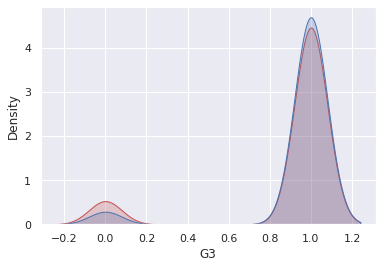

In [47]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(y_binary_train, shade=True, color="r")
fig = sns.kdeplot(y_binary_test, shade=True, color="b")
plt.show()

Распределение практически одинаковое и не будет негавтино влиять на процесс обучения

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

5-fold validation

In [49]:
five_fold = StratifiedKFold(n_splits=5, shuffle=True)
tree_models = []
tree_scores = []

for train_index, test_index in five_fold.split(x_train, y_train):
    # cv train 
    train_x = x_train[train_index]
    train_y = y_binary_train.iloc[train_index]
    # cv test
    test_x = x_train[test_index]
    test_y = y_binary_train.iloc[test_index]
    # model
    model = DecisionTreeClassifier(max_depth=5)
    model.fit(train_x, train_y)
    tree_models.append(model)
    # score
    # pred_y = model.predict(test_x)
    score = model.score(test_x, test_y)
    tree_scores.append(score)

print("CV MEAN SCORE: ", np.mean(tree_scores))
print("All scores: ", ', '.join(list(map(lambda x: "{:.3f}".format(x), tree_scores))))

CV MEAN SCORE:  0.8802395209580839
All scores:  0.862, 0.874, 0.868, 0.904, 0.892


Visualize

In [51]:
import graphviz
from sklearn.tree import export_graphviz

In [59]:
dot_data = export_graphviz(tree_models[0], 
                           out_file=None, 
                           feature_names=learning_data.drop(columns=['G1']).columns, 
                           class_names=['failed','passed'],
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render("decision_tree_example.pdf") 

'decision_tree_example.pdf.pdf'

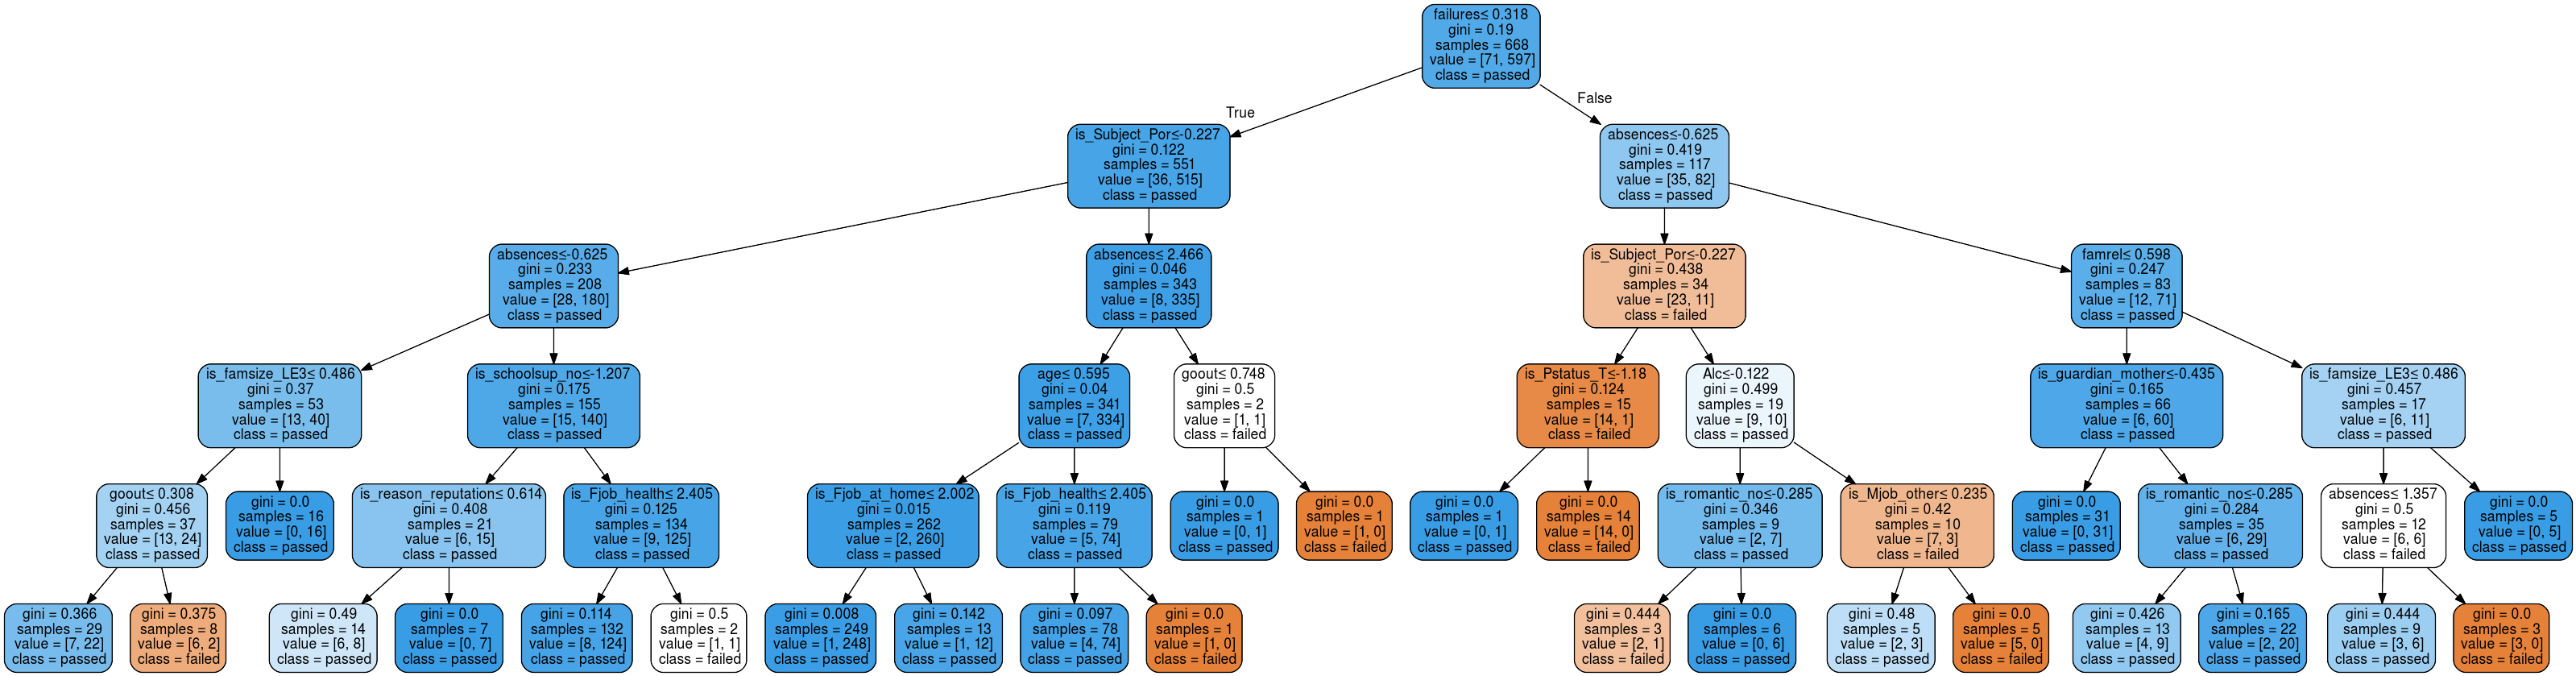

In [60]:
from wand.image import Image as WImage
img = WImage(filename="decision_tree_example.pdf")
img

Compare trees

### Задание 2  
  
На кросс-валидации (5-fold из 2 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

In [68]:
from sklearn import metrics

In [69]:
def bi_class_scores(predicted, labels, printable=False):
  scores = dict()
  scores['precision'] = metrics.precision_score(labels, predicted)
  scores['recall'] = metrics.recall_score(labels, predicted)                                                
  scores['f1'] = metrics.f1_score(labels, predicted)
  scores['accuracy'] = metrics.accuracy_score(labels, predicted)
  scores['roc-auc'] = metrics.roc_auc_score(labels, predicted)
  # print
  if printable:
    scores_table = [(key, value) for key, value in scores.items()]
    print('SCORES:')
    print(tb(scores_table, headers=('metric', 'score'), tablefmt="fancy_grid"))
  return scores

In [61]:
def bi_class_compare(predicted, labels, printable=False):
  pass

In [80]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [87]:
# your code here

double_five_fold = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
# trees_test_numbers = [1, 5, 10, 15, 20, 40, 75, 100, 125, 150, 175, 200]
trees_test_numbers = np.arange(1, 50, 1)

table_rows = []

for trees_number in trees_test_numbers:
  scores = []
  for train_index, test_index in five_fold.split(x_train, y_binary_test):
      # cv train 
      train_x = x_train[train_index]
      train_y = y_binary_train.iloc[train_index]
      # cv test
      test_x = x_train[test_index]
      test_y = y_binary_train.iloc[test_index]
      # model
      model = RandomForestClassifier(n_estimators=trees_number)
      model.fit(train_x, train_y)
      # score
      pred_y = model.predict(test_x)
      scores.append(bi_class_scores(pred_y, test_y))

  mean_scores = {key: [] for key in scores[0].keys()}
  for example in scores:
    for key, value in example.items():
      mean_scores[key].append(value)
  
  for key in mean_scores.keys():
    mean_scores[key] = np.mean(mean_scores[key])
    # trees, score, metric
    row = (trees_number, mean_scores[key], key)
    table_rows.append(row)
  
trees_number_df = pd.DataFrame(table_rows, 
                               columns=['trees_number', 'score', 'metric'])
trees_number_df

,trees_number,score,metric
0,1,0.909637,precision
1,1,0.916973,recall
2,1,0.913086,f1
3,1,0.844311,accuracy
4,1,0.573588,roc-auc
...,...,...,...
240,49,0.899774,precision
241,49,0.997324,recall
242,49,0.946027,f1
243,49,0.898204,accuracy


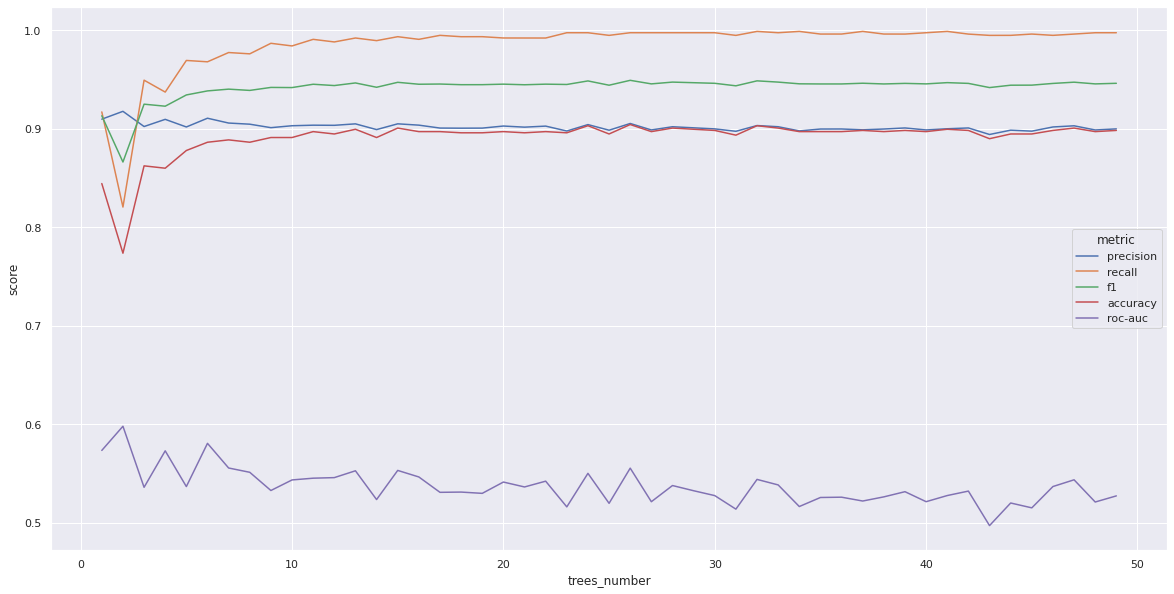

In [88]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=trees_number_df, x="trees_number", y="score", hue="metric")
plt.show()

***
**Вывод:**  
Основываясь на полученном графике оптимальное количество деревьев находится в районе 7-10
***

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Обучите Random Forest  с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

In [89]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [92]:
params = {
    'randomforestclassifier__n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                                             12, 15, 17, 20, 25, 40, 75, 100], 
    'randomforestclassifier__criterion': ['gini', 'entropy'], 
    'randomforestclassifier__max_depth': [2, 3, 4, 5, 10, 15 None]
}

In [93]:
five_fold = KFold(n_splits=5, shuffle=True)
rf_bi_class = RandomForestClassifier(random_state=13)
rf_bi_class_pipeline = make_pipeline(rf_bi_class)

rf_bi_class_grid = GridSearchCV(rf_bi_class_pipeline, params, cv=five_fold, 
                                scoring='f1', n_jobs=-1)

In [96]:
%%time
rf_bi_class_grid.fit(x_train, y_binary_train)

CPU times: user 3.19 s, sys: 134 ms, total: 3.33 s
Wall time: 47.9 s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                     

In [97]:
rf_bi_class_grid.best_params_

{'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__n_estimators': 20}

In [102]:
rf_bi_class_grid.best_score_

0.9474470250793129

In [104]:
rf_bi_class_model = RandomForestClassifier(criterion='entropy', n_estimators=20)
rf_bi_class_model.fit(x_train, y_binary_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
y_predicted = rf_bi_class_model.predict(x_test)
print('F1: ', metrics.f1_score(y_binary_test, y_predicted))
print(classification_report(y_binary_test, y_predicted))

F1:  0.9752475247524752
              precision    recall  f1-score   support

           0       1.00      0.17      0.29        12
           1       0.95      1.00      0.98       197

    accuracy                           0.95       209
   macro avg       0.98      0.58      0.63       209
weighted avg       0.95      0.95      0.94       209



In [106]:
trees_scores = [metrics.f1_score(y_binary_test, tree.predict(x_test)) 
                for tree in rf_bi_class_model.estimators_]

trees_scores = pd.Series(trees_scores)
trees_scores

0     0.918206
1     0.901333
2     0.938144
3     0.930591
4     0.936061
5     0.941176
6     0.929870
7     0.923483
8     0.934726
9     0.948980
10    0.932292
11    0.920213
12    0.940568
13    0.927461
14    0.938462
15    0.915789
16    0.927083
17    0.924282
18    0.927083
19    0.918635
dtype: float64

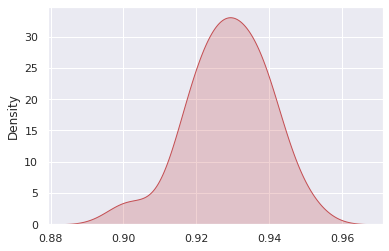

In [107]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(trees_scores, shade=True, color="r")
plt.show()

***
**Вывод:**  
f1 score ансамбля - `0.975`  
f1 scores деревьев - большинство значений расположены в промежутке от `0.92-0.94`

Каждое дерево по отдельности предсказывает результат хуже, чем в ансамбле.
***

### Задание 4  
  
* Примените логистическую регрессию для решения задачи, подберите оптимальные значения гиперпараметров. Оцените качество (roc auc) на 5-fold валидации из 2 повторений. 
* Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Обучите логистическую модель с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество - постройте ROC-кривую, вычислите roc auc. Вычислите аналогичную метрику для Random Forest из Задания 3, сравните точность моделей. 

In [108]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [116]:
params = {
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'saga', 'sag', 'liblinear'], 
    'logisticregression__class_weight': ['balanced', None],
    'logisticregression__multi_class': ['ovr', 'multinomial']
}

In [117]:
double_five_fold = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
logistic_bi_reg = LogisticRegression(max_iter=1000)
logistic_bi_pipeline = make_pipeline(logistic_bi_reg)

log_bi_reg_grid = GridSearchCV(logistic_bi_pipeline, params, cv=five_fold, 
                               scoring='roc_auc', n_jobs=-1)

In [118]:
%%time
log_bi_reg_grid.fit(x_train, y_binary_train)

CPU times: user 316 ms, sys: 25.6 ms, total: 342 ms
Wall time: 7.74 s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=1000,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                 

In [119]:
log_bi_reg_grid.best_params_

{'logisticregression__class_weight': None,
 'logisticregression__multi_class': 'ovr',
 'logisticregression__solver': 'liblinear'}

In [120]:
log_bi_reg_grid.best_score_

0.7545297976930533

#### Double 5-fold Validation

Logistic

In [126]:
log_bi_reg_model = LogisticRegression(multi_class='ovr', solver='liblinear')

In [127]:
scores = cross_val_score(log_bi_reg_model, x_train, y_binary_train, 
                         cv=double_five_fold, 
                         scoring='roc_auc')
print(np.mean(scores))
scores

0.7598481379128833


array([0.77568627, 0.78156863, 0.81058911, 0.70357942, 0.78001491,
       0.81686275, 0.68745098, 0.81319911, 0.68941089, 0.74011931])

Random Forest

In [129]:
rf_bi_class_model = RandomForestClassifier(criterion='entropy', n_estimators=20)

In [130]:
scores = cross_val_score(rf_bi_class_model, x_train, y_binary_train, 
                         cv=double_five_fold, 
                         scoring='roc_auc')
print(np.mean(scores))
scores

0.7790725095407289


array([0.72117647, 0.82823529, 0.8264355 , 0.71290082, 0.80406413,
       0.84784314, 0.77490196, 0.65604027, 0.8310962 , 0.78803132])

Random Forest показывает результат немного лучше

#### Fully fitted

In [133]:
log_bi_reg_model = LogisticRegression(multi_class='ovr', solver='liblinear')
_ = log_bi_reg_model.fit(x_train, y_binary_train)

rf_bi_class_model = RandomForestClassifier(criterion='entropy', n_estimators=20)
_ = rf_bi_class_model.fit(x_train, y_binary_train)


Logistic


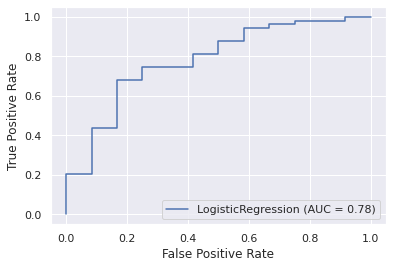

In [137]:
metrics.plot_roc_curve(log_bi_reg_model, x_test, y_binary_test)  
print('Logistic')
plt.show()    

Random Forest


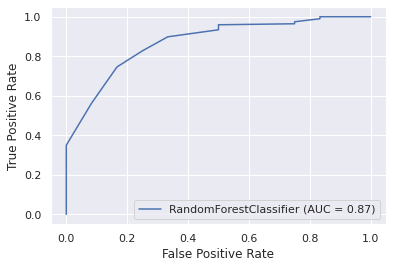

In [139]:
metrics.plot_roc_curve(rf_bi_class_model, x_test, y_binary_test)  
print('Random Forest')
plt.show()    

***
**Вывод:**  
`Random Forest` покала себя лучше `Logistic Regression`  
как на 5-fold валидации так и во время теста на отложенной выборке

*RFC-ROC-AUC:* `0.87`  
*LR-ROC-AUC:* `0.78`

***

### Задание 5  
  
* Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.  
* Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.  
* Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.  
* Обучите модель с настроенными параметрами на всех данных для моделирования и оцените качество на отложенной выборке. Сравните результаты с другими моделями, дайте комментарий.

In [141]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

#### Рост количества деревьев

In [147]:
five_fold = KFold(n_splits=5, shuffle=True)

trees_list = np.arange(1, 50, 1)

table_rows = []

for trees_number in trees_list:
  tree_scores = []
  for train_index, test_index in five_fold.split(x_train, y_train):
      # cv train 
      train_x = x_train[train_index]
      train_y = y_binary_train.iloc[train_index]
      # cv test
      test_x = x_train[test_index]
      test_y = y_binary_train.iloc[test_index]
      # model
      model = XGBClassifier(n_estimators=trees_number)
      model.fit(train_x, train_y)
      tree_models.append(model)
      # score
      pred_y = model.predict(test_x)
      score = metrics.f1_score(test_y, pred_y)
      tree_scores.append(score)
  mean_score = np.mean(tree_scores)
  row = (trees_number, mean_score)
  table_rows.append(row)

xgbc_df = pd.DataFrame(table_rows, columns=('trees_number', 'score'))
xgbc_df.head()

,trees_number,score
0,1,0.948116
1,2,0.945079
2,3,0.950071
3,4,0.950436
4,5,0.950729


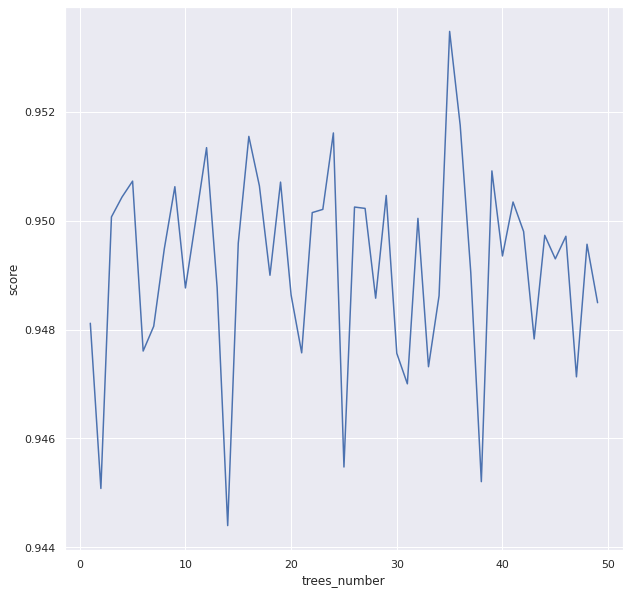

In [148]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=xgbc_df, x="trees_number", y="score")
plt.show()

Значение `f1-score` практически не меняются от увеличения количества деревьев

#### Подбор параметров

In [149]:
params = {
    'xgbclassifier__n_eta': np.arange(0, 1, 0.1), 
    'xgbclassifier__sampling_method': ['uniform', 'gradient_based'],
    'xgbclassifier__max_depth': np.arange(1, 15, 2),
    'xgbclassifier__gamma': [0, 1, 2, 5, 10],
}

In [150]:
five_fold = KFold(n_splits=5, shuffle=True)
xgbc_clas = XGBClassifier()
xgbc_pipeline = make_pipeline(xgbc_clas)

xgbc_grid = GridSearchCV(xgbc_pipeline, params, cv=five_fold, 
                         scoring='f1', n_jobs=-1)

In [152]:
%%time
xgbc_grid.fit(x_train, y_binary_train)

CPU times: user 15.3 s, sys: 848 ms, total: 16.1 s
Wall time: 7min 20s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('xgbclassifier',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.1,
                                                      max_delta_step=0,
                                                      max_depth=3,
                                                      min_child_weight=1,
                                                      missing=None,
                  

In [153]:
xgbc_grid.best_params_

{'xgbclassifier__gamma': 0,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__n_eta': 0.0,
 'xgbclassifier__sampling_method': 'uniform'}

In [154]:
xgbc_grid.best_score_

0.9529755437469822

In [156]:
xgbc_model = XGBClassifier()
_ = xgbc_model.fit(x_train, y_binary_train)

y_predicted = xgbc_model.predict(x_test) 
print('F1 score:', metrics.f1_score(y_binary_test, y_predicted))

F1 score: 0.9698492462311556


XGBC


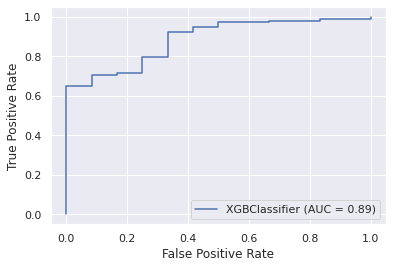

In [158]:
metrics.plot_roc_curve(xgbc_model, x_test, y_binary_test)  
print('XGBC')
plt.show()    

In [161]:
print(classification_report(y_binary_test, y_predicted))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40        12
           1       0.96      0.98      0.97       197

    accuracy                           0.94       209
   macro avg       0.73      0.66      0.68       209
weighted avg       0.93      0.94      0.94       209



***
**Вывод:**  
`XGBClassifier` оказался лучше как `Random Forest`, так и `Logistic Regression`  
Модель хорошо предсказывает оба класса, несмотря на низкий support

**XGBC-ROC-AUC:** `0.89`  
**XGBC-F1:** `0.97`   

*RFC-ROC-AUC:* `0.87`  
*LR-ROC-AUC:* `0.78`

***

##  Часть 4. Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* Для решения задачи примените следующие методы:  
  * KNN  
  * Логистическая регрессия  
  * Деревья решений  
  * Random Forest
  * Gradient Boosting
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, используйте confusion matrix и производные от нее метрики. Сделайте выводы.    

### Prepare labels

Целевая переменная будет представлена следующими классами:  
- 0 - Отлично
- 1 - Хорошо
- 2 - Удовлетворительно
- 3 - Неудовлетворительно

In [309]:
replace_dict = dict()
for score in range(21):
  if score < 8:
    replace_dict[score] = 3
  elif 8 <= score <= 13:
    replace_dict[score] = 2
  elif 14 <= score <= 17:
    replace_dict[score] = 1
  else:
    replace_dict[score] = 0

', '.join([f"{key}: {value}" for key, value in replace_dict.items()])

'0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 1, 15: 1, 16: 1, 17: 1, 18: 0, 19: 0, 20: 0'

In [310]:
y_train = y_train.replace(replace_dict)
y_train

860    2
269    2
581    3
775    2
669    2
      ..
866    3
742    2
74     3
176    1
338    2
Name: G3, Length: 835, dtype: int64

In [311]:
y_test = y_test.replace(replace_dict)
y_test

640    1
722    1
914    2
731    2
688    2
      ..
233    2
794    2
898    3
416    2
870    1
Name: G3, Length: 209, dtype: int64

Убираем `G1` признак

In [312]:
x_train = x_no_g1_train
x_test  = x_no_g1_test

Рассмотрим распределение G3 в выборках `y_train` и `y_test`

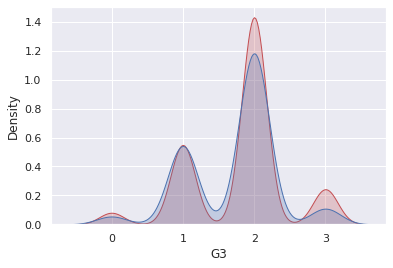

In [60]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(y_train, shade=True, color="r")
fig = sns.kdeplot(y_test, shade=True, color="b")
plt.show()

Мы можем видеть, что распределение G3 в `y_train` и `y_test` выборках одинаково

In [96]:
def class_scores(predicted, labels, printable=False):
  scores = dict()
  scores['precision_macro'] = metrics.precision_score(labels, predicted, 
                                                      average='macro')
  scores['precision_weighted'] = metrics.precision_score(labels, predicted, 
                                                         average='weighted')
  scores['recall_macro'] = metrics.recall_score(labels, predicted, 
                                                average='macro')
  scores['recall_weighted'] = metrics.recall_score(labels, predicted, 
                                                   average='weighted')
  scores['f1_macro'] = metrics.f1_score(labels, predicted, 
                                        average='macro')
  scores['f1_weighted'] = metrics.f1_score(labels, predicted, 
                                           average='weighted')
  scores['accuracy'] = metrics.accuracy_score(labels, predicted)
  # print
  if printable:
    scores_table = [(key, value) for key, value in scores.items()]
    print('SCORES:')
    print(tb(scores_table, headers=('metric', 'score'), tablefmt="fancy_grid"))
  return scores

In [100]:
def class_scores_compare(predicted: dict, labels: dict, 
                         print_sk_report=True, printable=True):
  scores_train = class_scores(predicted['train'], labels['train'])
  scores_test  = class_scores(predicted['test'], labels['test'])
  # print
  if printable:
    if print_sk_report:
      print('TRAIN:')
      print(classification_report(labels['train'], predicted['train']))
      print('\nTEST:')
      print(classification_report(labels['test'], predicted['test']))
    else:
      keys = scores_train.keys()
      train_values = scores_train.values()
      test_values = scores_test.values()
      scores_table = [(key, train, test) for key, train, test in 
                      zip(keys, train_values, test_values)]
      print('SCORES:')
      print(tb(scores_table, 
              headers=('metric', 'train scores', 'test scores'), 
              tablefmt="fancy_grid"))      
      
  return scores_train, scores_test

In [93]:
class_test_scores = dict()

In [376]:
from sklearn.metrics import plot_confusion_matrix

### KNN

In [78]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [109]:
params = {
    'kneighborsclassifier__n_neighbors': np.arange(1, 50, 1), 
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['ball_tree', 'kd_tree', 'brute']
}

In [110]:
five_fold = KFold(n_splits=5, shuffle=True)
knn_clas = KNeighborsClassifier()
knn_pipeline = make_pipeline(knn_clas)

knn_grid = GridSearchCV(knn_pipeline, params, cv=five_fold, 
                        scoring='f1_weighted', n_jobs=-1)

In [111]:
%%time
knn_grid.fit(x_train, y_train)

CPU times: user 2.77 s, sys: 122 ms, total: 2.9 s
Wall time: 21.7 s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kneighborsclassifier',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'kneighborscl...
                                                             'kd_tree',
                                   

In [112]:
knn_grid.best_params_

{'kneighborsclassifier__algorithm': 'ball_tree',
 'kneighborsclassifier__n_neighbors': 3,
 'kneighborsclassifier__weights': 'distance'}

In [113]:
knn_classifier = knn_grid.best_estimator_

In [115]:
y_predicted_train = knn_classifier.predict(x_train)
y_predicted_test  = knn_classifier.predict(x_test)

_, class_test_scores['knn'] = class_scores_compare({'train': y_predicted_train, 
                                                    'test': y_predicted_test},
                                                   {'train': y_train, 
                                                    'test': y_test})

TRAIN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00       199
           2       1.00      1.00      1.00       519
           3       1.00      1.00      1.00        88

    accuracy                           1.00       835
   macro avg       1.00      1.00      1.00       835
weighted avg       1.00      1.00      1.00       835


TEST:
              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.54      0.52      0.53        60
           2       0.76      0.80      0.78       131
           3       0.18      0.17      0.17        12

    accuracy                           0.67       209
   macro avg       0.50      0.41      0.43       209
weighted avg       0.65      0.67      0.66       209



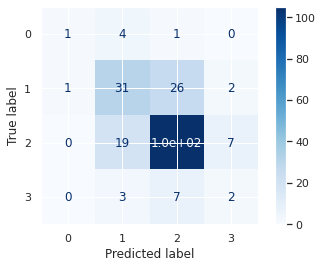

In [380]:
plot_confusion_matrix(knn_classifier, x_test, y_test, cmap=plt.get_cmap('Blues'))
plt.show()

Так как `KNN` запоминает всю `train` выборку, то и оценки на ней будут максимальные.  

Если же смотреть на результаты предсказания на `test` выборке,  
то видна главная проблема - классы `0` и `1`, у которых низкий  
support (количество примеров, представлоенных в выборке),  
ожидаемо предсказываются хуже, из за чего портится общая оценка классификатора.  

### Логистическая регрессия

In [116]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [137]:
params = {
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'saga', 'sag'], 
    'logisticregression__class_weight': ['balanced', None],
    'logisticregression__multi_class': ['ovr', 'multinomial']
}

In [138]:
five_fold = KFold(n_splits=5, shuffle=True)
logistic_reg = LogisticRegression(max_iter=1000)
logistic_pipeline = make_pipeline(logistic_reg)

log_reg_grid = GridSearchCV(logistic_pipeline, params, cv=five_fold, 
                            scoring='f1_weighted', n_jobs=-1)

In [145]:
%%time
log_reg_grid.fit(x_train, y_train)

CPU times: user 556 ms, sys: 116 ms, total: 672 ms
Wall time: 16.5 s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=1000,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                 

In [147]:
log_reg_grid.best_params_

{'logisticregression__class_weight': None,
 'logisticregression__multi_class': 'ovr',
 'logisticregression__solver': 'newton-cg'}

In [148]:
log_reg_model = log_reg_grid.best_estimator_

In [144]:
y_predicted_train = log_reg_model.predict(x_train)
y_predicted_test  = log_reg_model.predict(x_test)

_, class_test_scores['log-regression'] = class_scores_compare({'train': y_predicted_train, 
                                                                'test': y_predicted_test},
                                                               {'train': y_train, 
                                                                'test': y_test})

TRAIN:
              precision    recall  f1-score   support

           0       1.00      0.03      0.07        29
           1       0.56      0.43      0.49       199
           2       0.71      0.88      0.79       519
           3       0.70      0.30      0.42        88

    accuracy                           0.68       835
   macro avg       0.74      0.41      0.44       835
weighted avg       0.68      0.68      0.65       835


TEST:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.56      0.38      0.46        60
           2       0.70      0.84      0.76       131
           3       0.33      0.25      0.29        12

    accuracy                           0.65       209
   macro avg       0.40      0.37      0.38       209
weighted avg       0.62      0.65      0.62       209



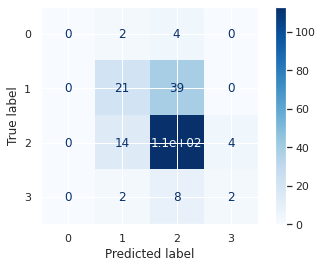

In [379]:
plot_confusion_matrix(log_reg_model, x_test, y_test, cmap=plt.get_cmap('Blues'))
plt.show()

Предсказания классов с низким support свойтсвенно также как и `KNN`, однако в этот раз класс `0` не предсказывается вовсе - все метрики равны нулю.

### Деревья решений

In [172]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [206]:
params = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'], 
    'decisiontreeclassifier__splitter': ['best', 'random'],
    'decisiontreeclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'decisiontreeclassifier__min_samples_split': np.arange(2, 10, 1),
    'decisiontreeclassifier__max_depth': [2, 3, 4, 5, 10, 12, 15, 17, 20, 30, None],
    'decisiontreeclassifier__random_state': [13]
}

In [207]:
five_fold = KFold(n_splits=5, shuffle=True)
dec_tree_class = DecisionTreeClassifier()
dec_tree_class_pipeline = make_pipeline(dec_tree_class)

dec_tree_class_grid = GridSearchCV(dec_tree_class_pipeline, params, cv=five_fold, 
                            scoring='f1_weighted', n_jobs=-1)

In [208]:
%%time
dec_tree_class_grid.fit(x_train, y_train)

CPU times: user 6.76 s, sys: 94 ms, total: 6.85 s
Wall time: 19.1 s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                            

In [209]:
dec_tree_class_grid.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 12,
 'decisiontreeclassifier__max_features': 'auto',
 'decisiontreeclassifier__min_samples_split': 4,
 'decisiontreeclassifier__random_state': 13,
 'decisiontreeclassifier__splitter': 'random'}

In [210]:
dec_tree_model = dec_tree_class_grid.best_estimator_

In [211]:
y_predicted_train = dec_tree_model.predict(x_train)
y_predicted_test  = dec_tree_model.predict(x_test)

_, class_test_scores['decistion-tree'] = class_scores_compare({'train': y_predicted_train, 
                                                                'test': y_predicted_test},
                                                               {'train': y_train, 
                                                                'test': y_test})

TRAIN:
              precision    recall  f1-score   support

           0       0.59      0.45      0.51        29
           1       0.75      0.55      0.63       199
           2       0.80      0.94      0.86       519
           3       0.91      0.58      0.71        88

    accuracy                           0.79       835
   macro avg       0.76      0.63      0.68       835
weighted avg       0.79      0.79      0.78       835


TEST:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.56      0.48      0.52        60
           2       0.72      0.75      0.73       131
           3       0.12      0.17      0.14        12

    accuracy                           0.62       209
   macro avg       0.35      0.35      0.35       209
weighted avg       0.62      0.62      0.61       209



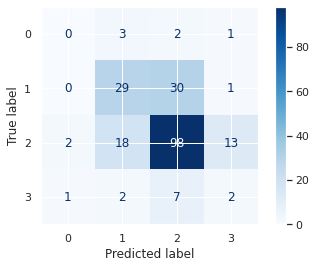

In [378]:
plot_confusion_matrix(dec_tree_model, x_test, y_test, cmap=plt.get_cmap('Blues'))
plt.show()

Снова видим нулевые метрики для `0` класса

### Random Forest

In [223]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [331]:
params = {
    # 'randomforestclassifier__criterion': ['gini', 'entropy'], 
    'randomforestclassifier__n_estimators': np.arange(50, 200, 5), 
    'randomforestclassifier__max_depth': [2, 3, 4, 5, 10, 15, 20, 30, 50, None],
    # 'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
    # 'randomforestclassifier__min_samples_split': np.arange(2, 10, 1)
}

In [332]:
five_fold = KFold(n_splits=5, shuffle=True)
rf_class = RandomForestClassifier(random_state=13)
rf_class_pipeline = make_pipeline(rf_class)

rf_class_grid = GridSearchCV(rf_class_pipeline, params, cv=five_fold, 
                            scoring='f1_weighted', n_jobs=-1)

In [333]:
%%time
rf_class_grid.fit(x_train, y_train)

CPU times: user 10.7 s, sys: 704 ms, total: 11.4 s
Wall time: 5min 28s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                     

In [334]:
rf_class_grid.best_params_

{'randomforestclassifier__max_depth': 30,
 'randomforestclassifier__n_estimators': 65}

In [359]:
rf_class_model = rf_class_grid.best_estimator_

In [360]:
y_predicted_train = rf_class_model.predict(x_train)
y_predicted_test  = rf_class_model.predict(x_test)

_, class_test_scores['random-forest'] = class_scores_compare({'train': y_predicted_train, 
                                                              'test': y_predicted_test},
                                                             {'train': y_train, 
                                                              'test': y_test})

TRAIN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00       199
           2       1.00      1.00      1.00       519
           3       1.00      1.00      1.00        88

    accuracy                           1.00       835
   macro avg       1.00      1.00      1.00       835
weighted avg       1.00      1.00      1.00       835


TEST:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.56      0.38      0.46        60
           2       0.71      0.89      0.79       131
           3       0.50      0.17      0.25        12

    accuracy                           0.67       209
   macro avg       0.44      0.36      0.37       209
weighted avg       0.64      0.67      0.64       209



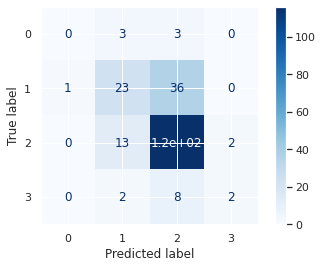

In [375]:
plot_confusion_matrix(rf_class_model, x_test, y_test, cmap=plt.get_cmap('Blues'))
plt.show()

Судя по оценкам, полученным на `train` выборке, модель переобучилась.  
Однако после эксперементов с гиперпараметрами выяснилось, что `testz метрики данной модели лучше.

### Gradient Boosting

In [319]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [320]:
params = {
    'gradientboostingclassifier__criterion': ['mse', 'mae'], 
    'gradientboostingclassifier__n_estimators': np.arange(50, 200, 5), 
    'gradientboostingclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'gradientboostingclassifier__loss': ['deviance', 'exponential']
}

In [321]:
five_fold = KFold(n_splits=5, shuffle=True)
gb_class = GradientBoostingClassifier(random_state=13)
gb_class_pipeline = make_pipeline(gb_class)

gb_class_grid = GridSearchCV(gb_class_pipeline, params, cv=five_fold, 
                            scoring='f1_weighted', n_jobs=-1)

In [322]:
%%time
gb_class_grid.fit(x_train, y_train)

CPU times: user 23.1 s, sys: 2.47 s, total: 25.5 s
Wall time: 57min 27s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('gradientboostingclassifier',
                                        GradientBoostingClassifier(ccp_alpha=0.0,
                                                                   criterion='friedman_mse',
                                                                   init=None,
                                                                   learning_rate=0.1,
                                                                   loss='deviance',
                                                                   max_depth=3,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                

In [323]:
gb_class_grid.best_params_

{'gradientboostingclassifier__criterion': 'mse',
 'gradientboostingclassifier__loss': 'deviance',
 'gradientboostingclassifier__max_features': 'log2',
 'gradientboostingclassifier__n_estimators': 145}

In [324]:
gb_class_model = gb_class_grid.best_estimator_

In [325]:
y_predicted_train = gb_class_model.predict(x_train)
y_predicted_test  = gb_class_model.predict(x_test)

_, class_test_scores['gradient-boosting'] = class_scores_compare({'train': y_predicted_train, 
                                                              'test': y_predicted_test},
                                                             {'train': y_train, 
                                                              'test': y_test})

TRAIN:
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        29
           1       0.87      0.78      0.82       199
           2       0.88      0.97      0.92       519
           3       0.97      0.72      0.82        88

    accuracy                           0.88       835
   macro avg       0.93      0.77      0.83       835
weighted avg       0.89      0.88      0.88       835


TEST:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.51      0.38      0.44        60
           2       0.72      0.85      0.78       131
           3       0.33      0.25      0.29        12

    accuracy                           0.66       209
   macro avg       0.39      0.37      0.38       209
weighted avg       0.62      0.66      0.63       209



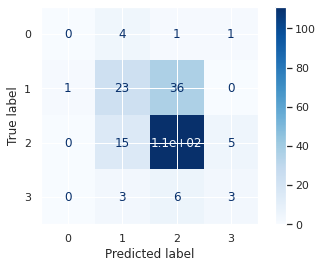

In [377]:
plot_confusion_matrix(gb_class_model, x_test, y_test, cmap=plt.get_cmap('Blues'))
plt.show()

### Results

In [361]:
def compare_estimators(scores: dict, printable=True):
  estimators_names = list(scores.keys())
  headers = ['estimators'] + list(scores[estimators_names[0]].keys())
  table = []

  for estimator in estimators_names:
    row = [estimator]
    for metric_key in scores[estimator].keys():
      row.append(scores[estimator][metric_key])
    table.append(row)

  # print
  print(tb(table, headers=headers, tablefmt='fancy_grid'))

  return table

In [362]:
_ = compare_estimators(class_test_scores)

╒═══════════════════╤═══════════════════╤══════════════════════╤════════════════╤═══════════════════╤════════════╤═══════════════╤════════════╕
│ estimators        │   precision_macro │   precision_weighted │   recall_macro │   recall_weighted │   f1_macro │   f1_weighted │   accuracy │
╞═══════════════════╪═══════════════════╪══════════════════════╪════════════════╪═══════════════════╪════════════╪═══════════════╪════════════╡
│ knn               │          0.495268 │             0.654403 │       0.412882 │          0.665072 │   0.432901 │      0.656798 │   0.665072 │
├───────────────────┼───────────────────┼──────────────────────┼────────────────┼───────────────────┼────────────┼───────────────┼────────────┤
│ log-regression    │          0.397628 │             0.61656  │       0.368257 │          0.650718 │   0.375601 │      0.624299 │   0.650718 │
├───────────────────┼───────────────────┼──────────────────────┼────────────────┼───────────────────┼────────────┼───────────────┼──────

**Best Multiclass Classifier**  



> *Выводы*:  
результаты обучения всех моделей сильно зависит от   
набора данных и распределения целевых значений в нем  
Способность предсказывать конкретный класс уменьшается с уменьшием  
встречающихся примеров (support), иногда вовсе до нуля




Среди обученных моделей я бы выделил `KNN` и `Random Forest`.  
Данные модели показали наилучшие метрики (accuracy + f1).  

Однако `KNN` с преимуществом над `RF` определяет нулевой класс с крайне низким support.


***
*model*: **RandomForestRegressor**  
*params*: n_estimators=65, max_depth=30 
*score (accuracy/f1)*: 0.67 / 0/64 
***
*model*: **KNeighborsClassifier**  
*params*: algorithm='ball_tree', n_neighbors=3, weights='distance'  
*score (accuracy/f1)*: 0.66 / 0/66